# Projeto Dashboard Treino e Dieta - Gabriel Ferreira

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Carregando os dados
df = pd.read_csv('hevy_workouts_raw.csv')

In [3]:
# Shape
df.shape

(9542, 14)

In [4]:
# Amostra dos dados
df.head(10)

title          start_time            end_time description  \
0  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
1  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
2  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
3  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
4  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
5  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
6  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
7  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
8  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   
9  Lower  13 Jan 2026, 18:43  13 Jan 2026, 20:03         NaN   

              exercise_title  superset_id exercise_notes  set_index set_type  \
0    Hip Adduction (Machine)          NaN            NaN          0   normal   
1    Hip Adduction (Machine)          NaN            NaN          1   normal   
2    Hip Adduction (Machine)          NaN            NaN          2  failure   
3      Straight Leg Deadlift          NaN          2RIR?          0   normal   
4      Straight Leg Deadlift          NaN          2RIR?          1   normal   
5        Leg Press (Machine)          NaN           2RIR          0   normal   
6        Leg Press (Machine)          NaN           2RIR          1   normal   
7  Seated Leg Curl (Machine)          NaN            NaN          0   normal   
8    Leg Extension (Machine)          NaN           1RIR          0   normal   
9    Leg Extension (Machine)          NaN           1RIR          1   normal   

   weight_kg  reps  distance_km  duration_seconds  rpe  
0      90.00   5.0          NaN               NaN  NaN  
1      86.25   6.0          NaN               NaN  NaN  
2      86.25   6.0          NaN               NaN  NaN  
3     100.00   6.0          NaN               NaN  NaN  
4     100.00   6.0          NaN               NaN  NaN  
5     260.00   5.0          NaN               NaN  NaN  
6     260.00   5.0          NaN               NaN  NaN  
7     110.00   6.0          NaN               NaN  NaN  
8     101.25   9.0          NaN               NaN  NaN  
9     101.25   7.0          NaN               NaN  NaN

In [5]:
# Tipo de dados
df.dtypes

title                object
start_time           object
end_time             object
description          object
exercise_title       object
superset_id         float64
exercise_notes       object
set_index             int64
set_type             object
weight_kg           float64
reps                float64
distance_km         float64
duration_seconds    float64
rpe                 float64
dtype: object

Observa-se que o start_time e end_time estão como object e deveriam ser datas.

In [6]:
# Colunas
df.columns

Index(['title', 'start_time', 'end_time', 'description', 'exercise_title',
       'superset_id', 'exercise_notes', 'set_index', 'set_type', 'weight_kg',
       'reps', 'distance_km', 'duration_seconds', 'rpe'],
      dtype='object')

In [7]:
# Criação do dicionário de dados com a descrição de cada variável
df_dict = {
    "title": "Nome do treino (Push, Pull, Legs, Push 1, Pull 1, Treino A, etc.",
    "start_time": "Data e horárrio do início do treino.",
    "end_time": "Data e horárrio do final do treino.",
    "description": "Comentários adicionados ao final do treino.",
    "exercise_title": "Nome do exercício realizado.",
    "superset_id": "Index para identificar supersets.",
    "exercise_notes": "Anotacoes realizadas durante a realizacao do exercicio.",
    "set_index": "Numero da serie realizada",
    "set_type": "Tipo de serie (Normal, Failure, Warmup).",
    "weight_kg": "Carga levantado na serie.",
    "reps": "Numero de repeticoes realizadas na serie.",
    "distance_km": "Distancia em kilometros realizadas no exercicio cardiovascular",
    "duration_segundos": "Duracao em segundos do exercicio cardiovascular ou exercicio que e controlado por tempo.",
    "rpe": "Rating of Perceived Exertion = Escala de Esforço Percebido. Escala subjetiva para avaliar a intensidade do esforço no treino."
}

Não tem a necessidade de se obter o horario incial e final do treino juntamente com a data, portanto precisamos quebrar em uma coluna com a data do treino (data_treino) e também o tempo de treino (horario do inicio_treino e final_treino).

### Análise Exploratória

In [8]:
# Verificando novamente tipo de dados
df.dtypes

title                object
start_time           object
end_time             object
description          object
exercise_title       object
superset_id         float64
exercise_notes       object
set_index             int64
set_type             object
weight_kg           float64
reps                float64
distance_km         float64
duration_seconds    float64
rpe                 float64
dtype: object

In [9]:
# Resumo estatístico (variáveis numéricas)
df.describe()

superset_id    set_index    weight_kg         reps  distance_km  \
count          0.0  9542.000000  8834.000000  9209.000000          1.0   
mean           NaN     1.136554    52.681326     9.452384          5.0   
std            NaN     1.179120    37.833297     2.975416          NaN   
min            NaN     0.000000     2.000000     4.000000          5.0   
25%            NaN     0.000000    21.250000     8.000000          5.0   
50%            NaN     1.000000    47.500000     9.000000          5.0   
75%            NaN     2.000000    75.000000    11.000000          5.0   
max            NaN     9.000000   285.000000   111.000000          5.0   

       duration_seconds  rpe  
count        333.000000  0.0  
mean        1041.585586  NaN  
std          246.361638  NaN  
min            0.000000  NaN  
25%          900.000000  NaN  
50%         1200.000000  NaN  
75%         1200.000000  NaN  
max         1800.000000  NaN

In [10]:
# Visualizando o total de linhas por coluna
df.count()

title               9542
start_time          9542
end_time            9542
description         4278
exercise_title      9542
superset_id            0
exercise_notes      1076
set_index           9542
set_type            9542
weight_kg           8834
reps                9209
distance_km            1
duration_seconds     333
rpe                    0
dtype: int64

In [11]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
print(valores_ausentes)

superset_id         9542
rpe                 9542
distance_km         9541
duration_seconds    9209
exercise_notes      8466
description         5264
weight_kg            708
reps                 333
title                  0
start_time             0
exercise_title         0
end_time               0
set_type               0
set_index              0
dtype: int64



superset_id == nunca utilizo então faz sentido estar com todos valores ausentes
rpe == mesmo do superset_id
distance_km == somente se colocar na esteira.. geralmente nao coloco pois faço por tempo
duration_seconds == duracao do cardio..só vai estar presente nos exercicios de cardio
exercise_notes == comentarios dos exercicios, nem sempre é necessário ter comentario
description == descrição do treinamento, se coloca ao finalizar o treino, nem sempre tbm colocamos


weight_kg = alguns exercicios nao tem carga, como exercicios com peso corporal e cardio, mas irei analisar;
reps = analisemos

In [12]:
# Valores ausentes coluna weight_kg
# Filtrando linhas onde 'wight_kg' é NaN e não são cardio
exercicios_excluidos = ['Treadmill', 'Stair Machine (Floors)', 'Stair Machine (Steps)', 'Stair Machine','Spinning', 'Walking', 'Air Bike']

linhas_ausentes_carga = df[
    df['weight_kg'].isna() &
    ~df['exercise_title'].isin(exercicios_excluidos)
]

linhas_ausentes_carga

title          start_time            end_time  \
1740                     Upper I  26 May 2025, 19:46  26 May 2025, 21:23   
1741                     Upper I  26 May 2025, 19:46  26 May 2025, 21:23   
1799                     Upper I  19 May 2025, 19:54  19 May 2025, 21:43   
3154             Push 2 e Pull 2  28 Dec 2024, 09:18  28 Dec 2024, 10:59   
3155             Push 2 e Pull 2  28 Dec 2024, 09:18  28 Dec 2024, 10:59   
...                          ...                 ...                 ...   
9411  Treino A - Costas + Biceps  27 Nov 2023, 17:19  27 Nov 2023, 18:18   
9518  Treino A - Costas + Biceps  21 Nov 2023, 17:54  21 Nov 2023, 18:48   
9519  Treino A - Costas + Biceps  21 Nov 2023, 17:54  21 Nov 2023, 18:48   
9520  Treino A - Costas + Biceps  21 Nov 2023, 17:54  21 Nov 2023, 18:48   
9521  Treino A - Costas + Biceps  21 Nov 2023, 17:54  21 Nov 2023, 18:48   

     description                   exercise_title  superset_id exercise_notes  \
1740         NaN             Chest Dip (Assisted)          NaN            NaN   
1741         NaN             Chest Dip (Assisted)          NaN            NaN   
1799         NaN             Chest Dip (Assisted)          NaN            NaN   
3154      Pull 2           Romanian Chair Sit Ups          NaN            NaN   
3155      Pull 2           Romanian Chair Sit Ups          NaN            NaN   
...          ...                              ...          ...            ...   
9411         NaN  Back Extension (Hyperextension)          NaN            NaN   
9518         NaN  Back Extension (Hyperextension)          NaN            NaN   
9519         NaN  Back Extension (Hyperextension)          NaN            NaN   
9520         NaN  Back Extension (Hyperextension)          NaN            NaN   
9521         NaN  Back Extension (Hyperextension)          NaN            NaN   

      set_index set_type  weight_kg  reps  distance_km  duration_seconds  rpe  
1740          0   normal        NaN   8.0          NaN               NaN  NaN  
1741          1  failure        NaN   8.0          NaN               NaN  NaN  
1799          1  failure        NaN   7.0          NaN               NaN  NaN  
3154          0   normal        NaN   9.0          NaN               NaN  NaN  
3155          1   normal        NaN   7.0          NaN               NaN  NaN  
...         ...      ...        ...   ...          ...               ...  ...  
9411          3   normal        NaN  10.0          NaN               NaN  NaN  
9518          0   normal        NaN  10.0          NaN               NaN  NaN  
9519          1   normal        NaN  10.0          NaN               NaN  NaN  
9520          2   normal        NaN  10.0          NaN               NaN  NaN  
9521          3   normal        NaN  10.0          NaN               NaN  NaN  

[376 rows x 14 columns]

In [13]:
# Visualizando onde temos valores ausentes
linhas_ausentes_carga = df[
    df['weight_kg'].isna() &
    ~df['exercise_title'].isin(exercicios_excluidos)
]

linhas_ausentes_carga['exercise_title'].value_counts()


exercise_title
Back Extension (Hyperextension)    201
Pull Up                             86
Knee Raise Parallel Bars            53
Leg Raise Parallel Bars              8
Bench Dip                            7
Decline Crunch                       4
Chin Up                              4
Chest Dip (Assisted)                 3
Romanian Chair Sit Ups               3
Decline Crunch (Weighted)            2
Squat (Smith Machine)                1
Squat (Bodyweight)                   1
Push Up                              1
Bicep Curl (Machine)                 1
Plank                                1
Name: count, dtype: int64

Back Extension (Hyperextension), Pull Up, Knee Raise Parallel Bars, Leg Raise Parallel Bars, Bench Dip, Decline Crunch, Chin Up, Chest Dip (Assisted),
Romanian Chair Sit Ups, Decline Crunch (Weighted), Squat (Bodyweight), Push Up  e Plank fazem sentido valores ausentes pois são exercicios com peso do corpo apenas, mas Bicep Curl (Machine) não e provavelmente o Squat (Smith Machine) foi um aquecimento sem carga, mas vamos analisar

In [14]:
# Filtrando esses dois exercicios com valores nulos em weight_kg
exercicios_interesse = [
    'Squat (Smith Machine)',
    'Bicep Curl (Machine)'
]

df[
    df['weight_kg'].isna() &
    df['exercise_title'].isin(exercicios_interesse)
]

title          start_time  \
5270                       Perna Completo  31 Jul 2024, 07:42   
6644  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   

                end_time description         exercise_title  superset_id  \
5270  31 Jul 2024, 09:01         NaN  Squat (Smith Machine)          NaN   
6644  14 May 2024, 12:36         NaN   Bicep Curl (Machine)          NaN   

     exercise_notes  set_index set_type  weight_kg  reps  distance_km  \
5270            NaN          0   warmup        NaN  30.0          NaN   
6644            NaN          2  failure        NaN   9.0          NaN   

      duration_seconds  rpe  
5270               NaN  NaN  
6644               NaN  NaN

Confirmamos Smith Machine como aquecimento, mas provavelmente temos um erro no exercicio de biceps, pois é uma série até a falha e o set_index é 2, o que siginfica que é a terceira série desse exercicio

In [15]:
# Analisando exatamente esse exercicio desse dia
df[
    (df['title'] == 'Costas + Biceps + Lombar - Treino 2') &
    (df['exercise_title'] == 'Bicep Curl (Machine)') &
    (df['start_time'].str.contains('14 May 2024'))
]

title          start_time  \
6642  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   
6643  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   
6644  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   

                end_time description        exercise_title  superset_id  \
6642  14 May 2024, 12:36         NaN  Bicep Curl (Machine)          NaN   
6643  14 May 2024, 12:36         NaN  Bicep Curl (Machine)          NaN   
6644  14 May 2024, 12:36         NaN  Bicep Curl (Machine)          NaN   

     exercise_notes  set_index set_type  weight_kg  reps  distance_km  \
6642            NaN          0   normal       54.0  12.0          NaN   
6643            NaN          1  failure       54.0  10.0          NaN   
6644            NaN          2  failure        NaN   9.0          NaN   

      duration_seconds  rpe  
6642               NaN  NaN  
6643               NaN  NaN  
6644               NaN  NaN

Após analise, comprovamos que de fato houve um erro na imputação manual, refletindo na ausência desse valor, que é 54.0 kg

In [16]:
# Imputando o valor correto nessa série
df.loc[6644, 'weight_kg'] = 54.0

In [17]:
# Revalidando a serie correta
df[
    (df['title'] == 'Costas + Biceps + Lombar - Treino 2') &
    (df['exercise_title'] == 'Bicep Curl (Machine)') &
    (df['start_time'].str.contains('14 May 2024'))
]

title          start_time  \
6642  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   
6643  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   
6644  Costas + Biceps + Lombar - Treino 2  14 May 2024, 11:11   

                end_time description        exercise_title  superset_id  \
6642  14 May 2024, 12:36         NaN  Bicep Curl (Machine)          NaN   
6643  14 May 2024, 12:36         NaN  Bicep Curl (Machine)          NaN   
6644  14 May 2024, 12:36         NaN  Bicep Curl (Machine)          NaN   

     exercise_notes  set_index set_type  weight_kg  reps  distance_km  \
6642            NaN          0   normal       54.0  12.0          NaN   
6643            NaN          1  failure       54.0  10.0          NaN   
6644            NaN          2  failure       54.0   9.0          NaN   

      duration_seconds  rpe  
6642               NaN  NaN  
6643               NaN  NaN  
6644               NaN  NaN

In [18]:
# Valores ausentes coluna REPS
# Filtrando linhas onde 'reps' é NaN e não são cardio
exercicios_excluidos = ['Treadmill', 'Stair Machine (Floors)', 'Stair Machine (Steps)', 'Stair Machine','Spinning', 'Walking', 'Air Bike']

linhas_ausentes_repeticoes = df[
    df['reps'].isna() &
    ~df['exercise_title'].isin(exercicios_excluidos)
]

linhas_ausentes_repeticoes

title          start_time  \
8022  (S1 ) Peito + Triceps + Abs - Treino 1  26 Feb 2024, 10:54   

                end_time description exercise_title  superset_id  \
8022  26 Feb 2024, 11:53    Treino 6          Plank          NaN   

     exercise_notes  set_index set_type  weight_kg  reps  distance_km  \
8022            NaN          0   normal        NaN   NaN          NaN   

      duration_seconds  rpe  
8022              48.0  NaN

Prancha também é um exercicio no qual não o fato de não se ter presente repeitções está tudo bem.

### Detecção de Outliers 

In [19]:
# Função para detectar outliers usando o método IQR
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

In [20]:
# Detectando e exibindo o total de outliers por coluna
colunas = ['weight_kg', 'reps']
for coluna in colunas:
    outliers = detectar_outliers(df, coluna)
    print(f"Total de outliers em '{coluna}': {len(outliers)}")


Total de outliers em 'weight_kg': 121
Total de outliers em 'reps': 239


In [21]:
# Detectar e exibir outliers para a coluna 'carga_kg'
outliers_carga_kg = detectar_outliers(df, 'weight_kg')

if not outliers_carga_kg.empty:
    print("Outliers em 'weight_kg (119) ':")
    print(outliers_carga_kg[['exercise_title', 'start_time', 'weight_kg', 'reps']])

Outliers em 'weight_kg (119) ':
           exercise_title          start_time  weight_kg  reps
5     Leg Press (Machine)  13 Jan 2026, 18:43      260.0   5.0
6     Leg Press (Machine)  13 Jan 2026, 18:43      260.0   5.0
73    Leg Press (Machine)   6 Jan 2026, 19:46      280.0   6.0
74    Leg Press (Machine)   6 Jan 2026, 19:46      280.0   5.0
132   Leg Press (Machine)  30 Dec 2025, 18:26      280.0   5.0
...                   ...                 ...        ...   ...
9253  Leg Press (Machine)   6 Dec 2023, 17:48      240.0   9.0
9464  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0
9465  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0
9466  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0
9467  Leg Press (Machine)  20 Nov 2023, 17:37      160.0  10.0

[121 rows x 4 columns]


In [22]:
# 1. Detecta todos os outliers novamente
outliers_original = detectar_outliers(df, 'weight_kg')

# 2. Agrupa e conta quantos outliers existem por título de exercício
contagem_outliers = outliers_original['exercise_title'].value_counts()

print("Distribuição de Outliers por Exercício:")
print(contagem_outliers)

Distribuição de Outliers por Exercício:
exercise_title
Leg Press (Machine)    121
Name: count, dtype: int64


Legpress é um exercicio onde o peso absoluto é significativamente maior comparado aos outros exercícios mas não necessariamente são outliers

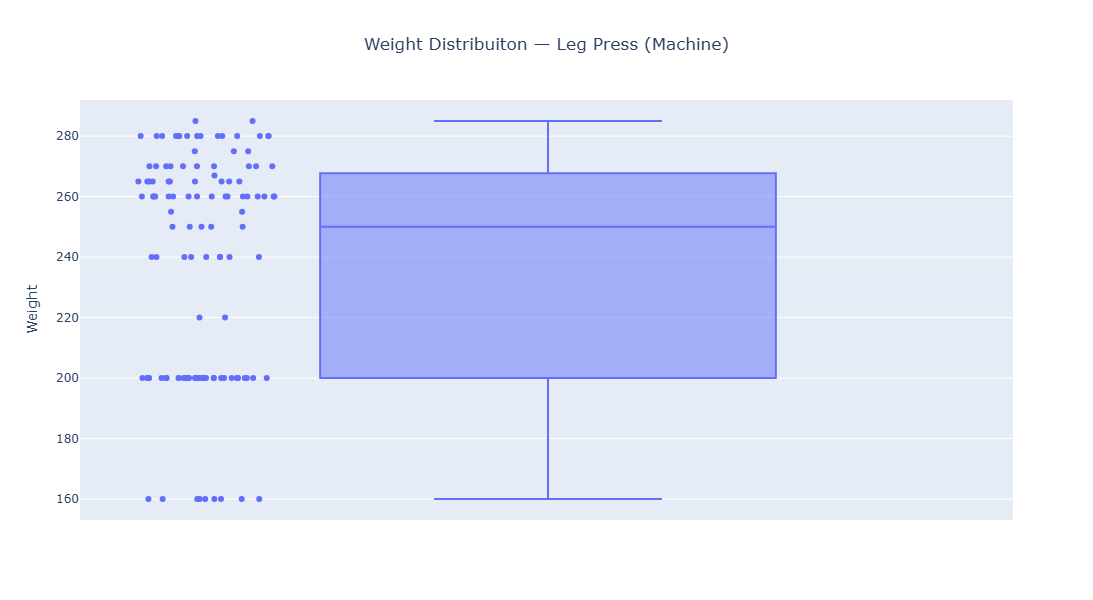

In [23]:
# Leg Press (Machine)
exercise_name = "Leg Press (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="weight_kg",points="all",hover_data=["reps","set_index","set_type","rpe","start_time"],title=f"Weight Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Weight",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Valores corretos, como meu treinamento é com base em sobrecarga progressiva, faz sentido os valores proximos de 280 estarem com poucos registros pois são as ultimas cargas levantadas.

In [24]:
# Detectar e exibir outliers para a coluna 'repeticoes'
outliers_repeticoes = detectar_outliers(df, 'reps')

if not outliers_repeticoes.empty:
    print("Outliers em 'repeticoes (209) ':")
    print(outliers_repeticoes[['exercise_title','weight_kg', 'reps']])

Outliers em 'repeticoes (209) ':
                       exercise_title  weight_kg  reps
3860    Standing Calf Raise (Machine)       20.0  30.0
3861    Standing Calf Raise (Machine)       40.0  25.0
3862    Standing Calf Raise (Machine)       60.0  20.0
3867    Standing Calf Raise (Machine)       40.0  24.0
3868    Standing Calf Raise (Machine)       20.0  30.0
...                               ...        ...   ...
8907   Incline Bench Press (Dumbbell)       17.5  20.0
8957  Seated Shoulder Press (Machine)       37.5  20.0
9021  Seated Shoulder Press (Machine)       37.5  20.0
9105  Seated Shoulder Press (Machine)       37.5  20.0
9282             Cable Fly Crossovers       10.0  16.0

[239 rows x 3 columns]


In [25]:
# 1. Detecta todos os outliers novamente
outliers_original = detectar_outliers(df, 'reps')

# 2. Agrupa e conta quantos outliers existem por título de exercício
contagem_outliers = outliers_original['exercise_title'].value_counts()

print("Distribuição de Outliers por Exercício:")
print(contagem_outliers)

Distribuição de Outliers por Exercício:
exercise_title
Standing Calf Raise (Machine)               117
Incline Bench Press (Dumbbell)               18
Lateral Raise (Dumbbell)                     11
Calf Extension (Machine)                      8
Chest Fly (Machine)                           8
Triceps Rope Pushdown                         7
Lat Pulldown (Cable)                          6
Triceps Extension (Cable)                     6
Single Arm Tricep Extension (Dumbbell)        6
Crunch (Machine)                              5
Single Arm Lateral Raise (Cable)              4
Seated Cable Row - V Grip (Cable)             4
Preacher Curl (Machine)                       4
Lat Pulldown (Machine)                        4
Iso-Lateral High Row (Machine)                4
Lateral Raise (Machine)                       4
Chest Press (Machine)                         4
Bicep Curl (Dumbbell)                         3
Seated Wrist Extension (Barbell)              3
Seated Shoulder Press (Machine)  

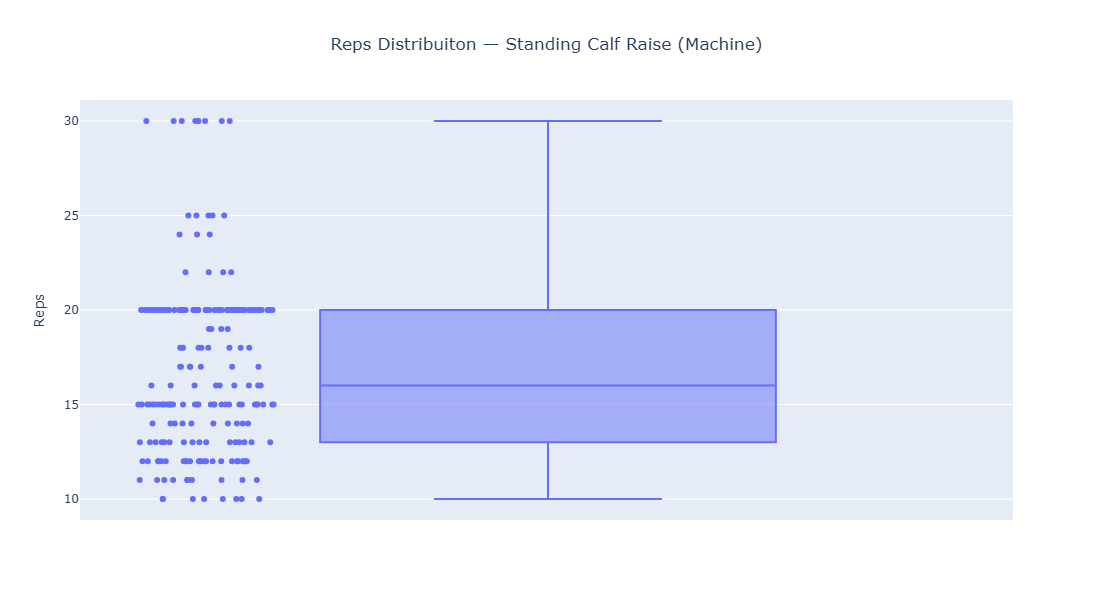

In [26]:
# Para Standing Calf Raise (Machine)
exercise_name = "Standing Calf Raise (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

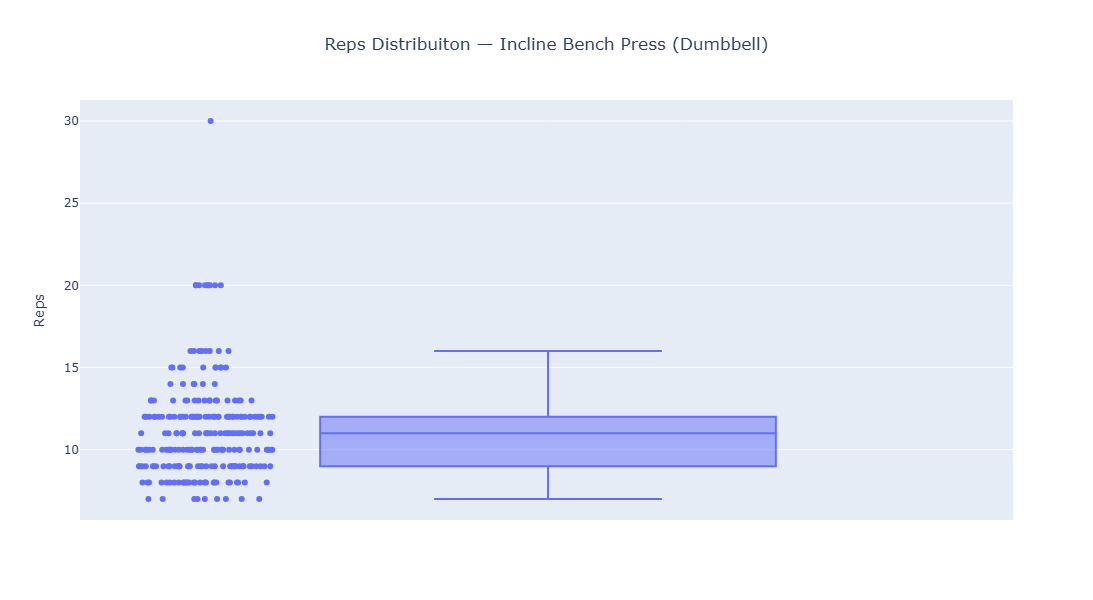

In [27]:
# Para Incline Bench Press (Dumbbell)
exercise_name = "Incline Bench Press (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (série de warm up)

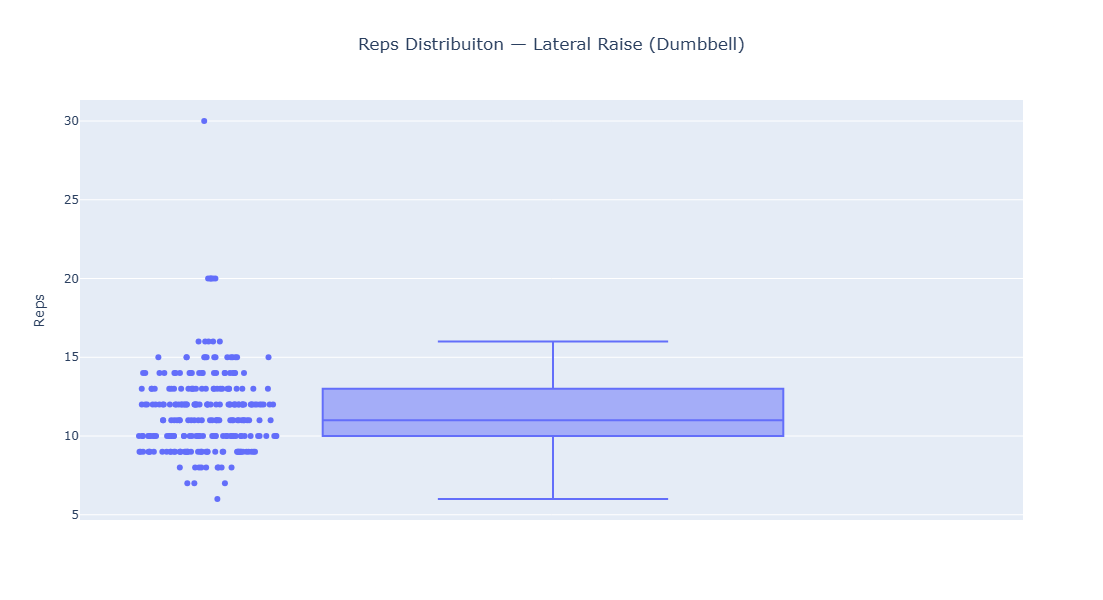

In [28]:
# Para Lateral Raise (Dumbbell)
exercise_name = "Lateral Raise (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (série de warm up/ carga baixa)

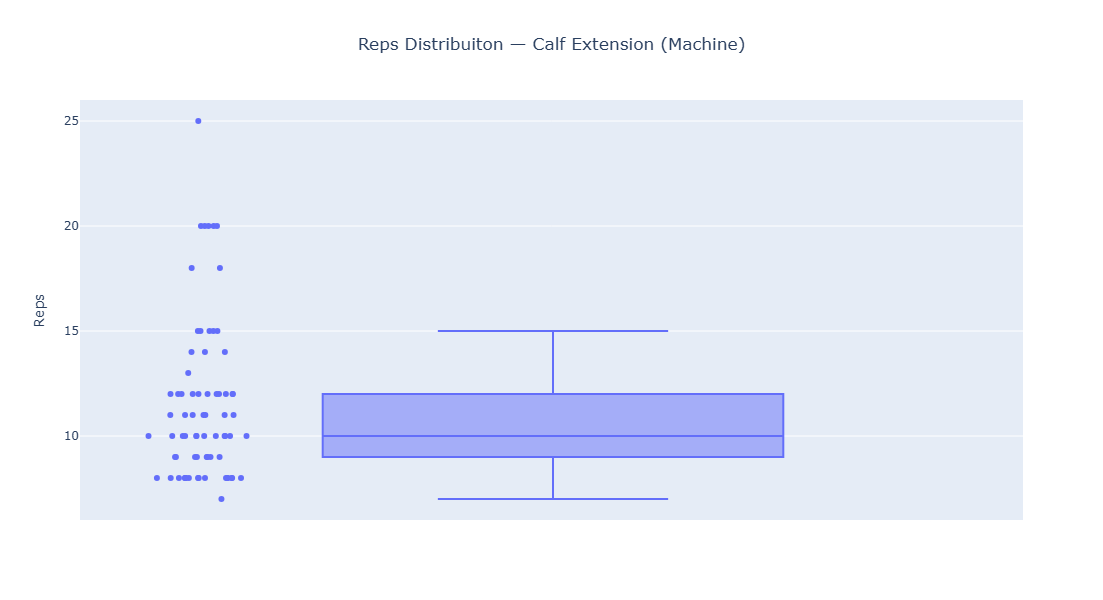

In [29]:
# Calf Extension (Machine)
exercise_name = "Calf Extension (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

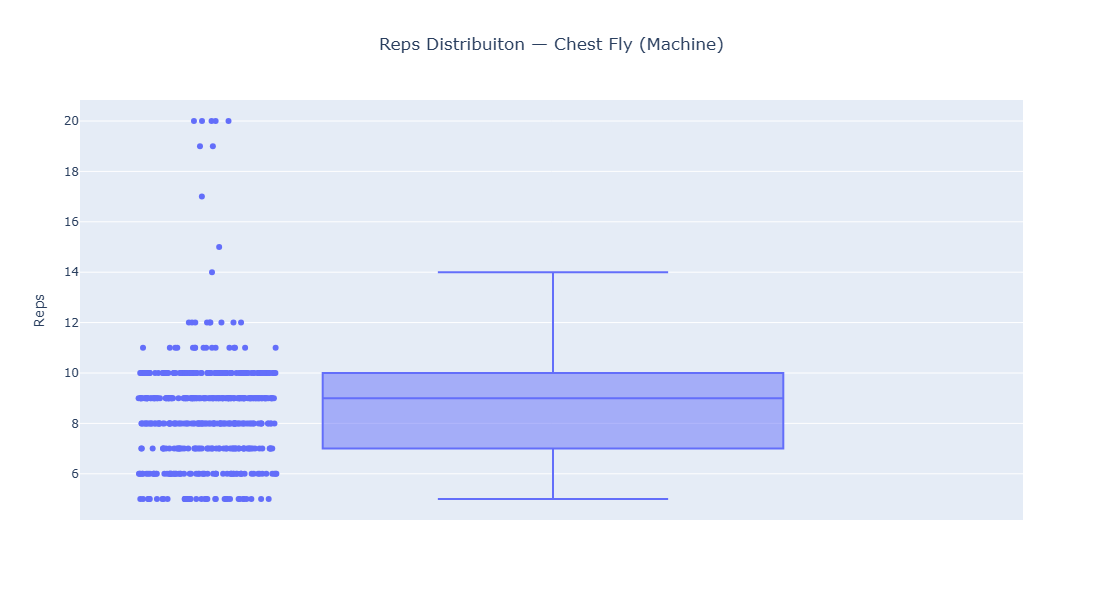

In [30]:
# Chest Fly (Machine)
exercise_name = "Chest Fly (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

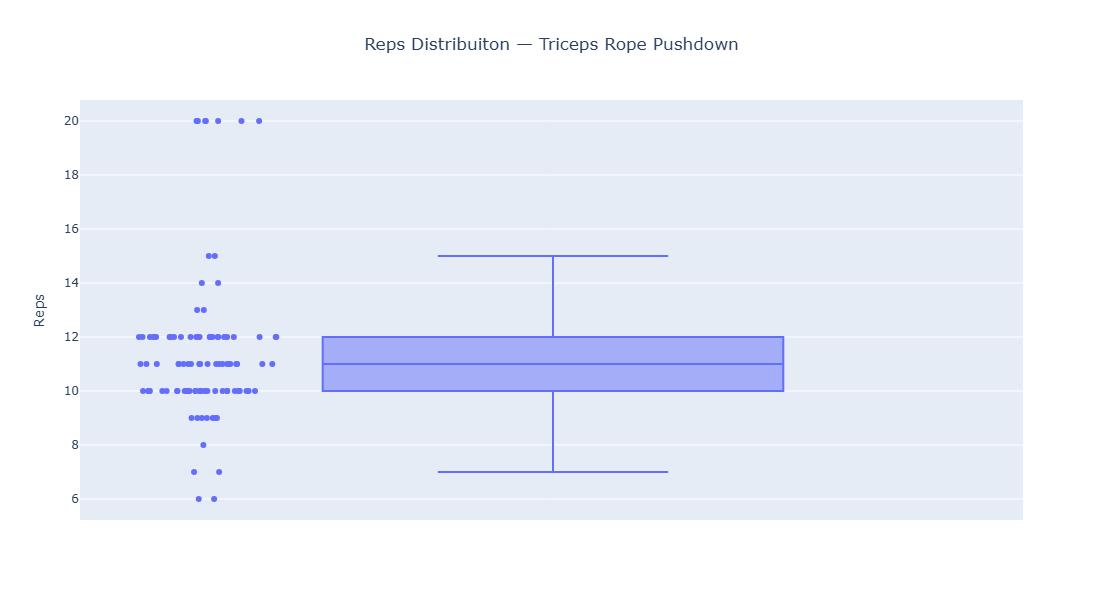

In [31]:
# Triceps Rope Pushdown
exercise_name = "Triceps Rope Pushdown"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

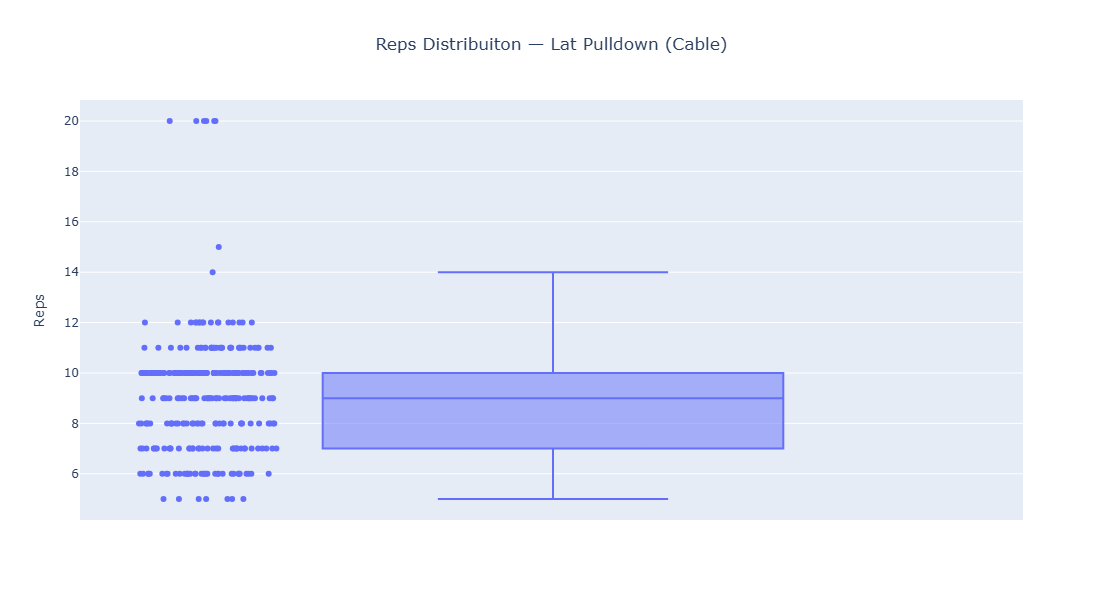

In [32]:
# Lat Pulldown (Cable)
exercise_name = "Lat Pulldown (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

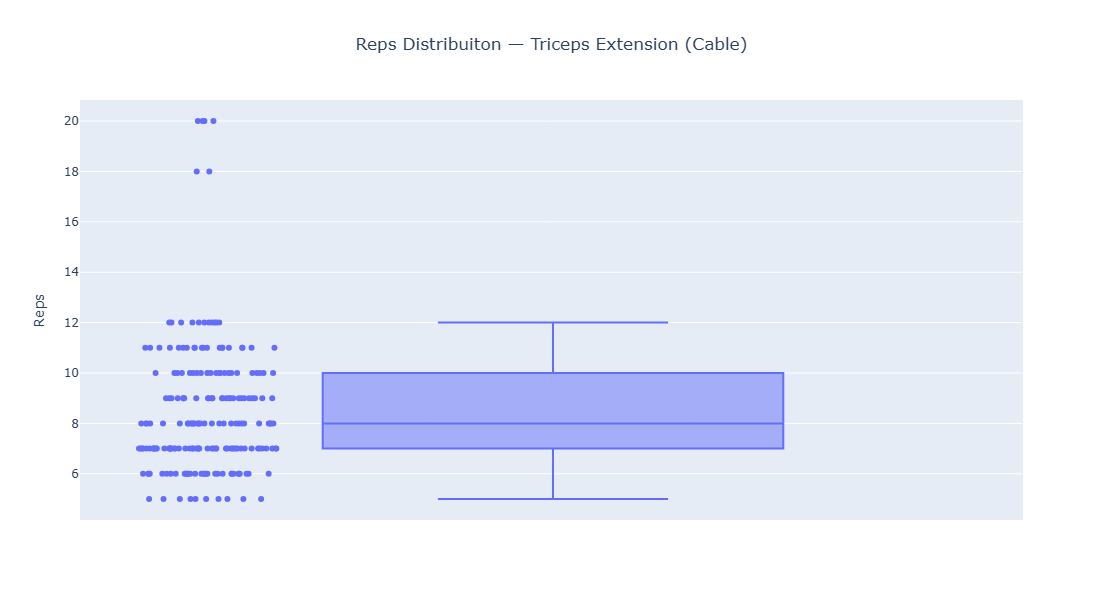

In [33]:
# Triceps Extension (Cable)
exercise_name = "Triceps Extension (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

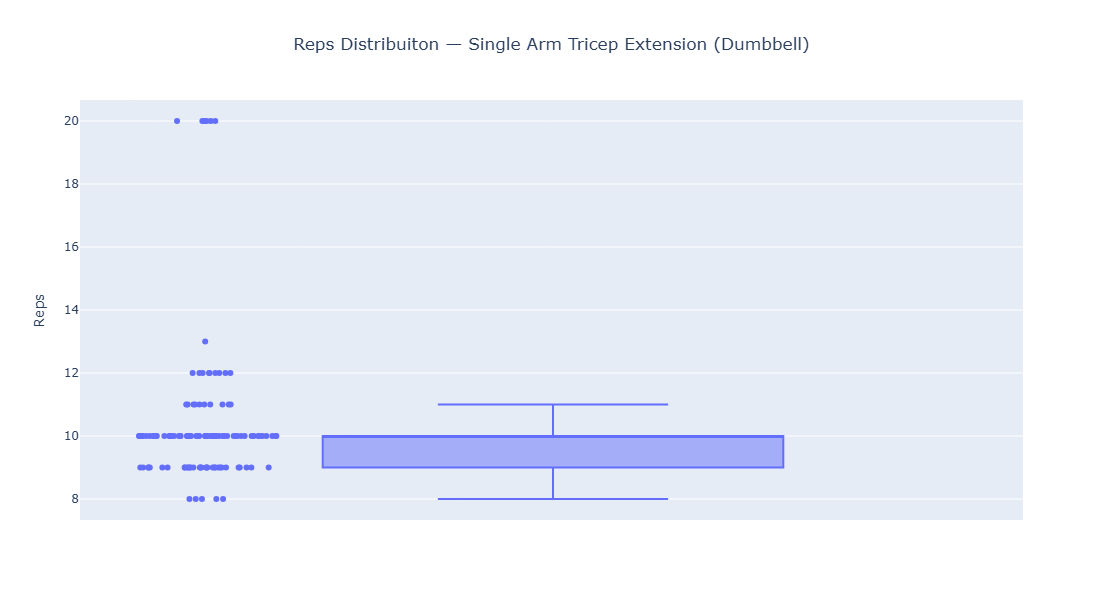

In [34]:
# Single Arm Tricep Extension (Dumbbell)
exercise_name = "Single Arm Tricep Extension (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

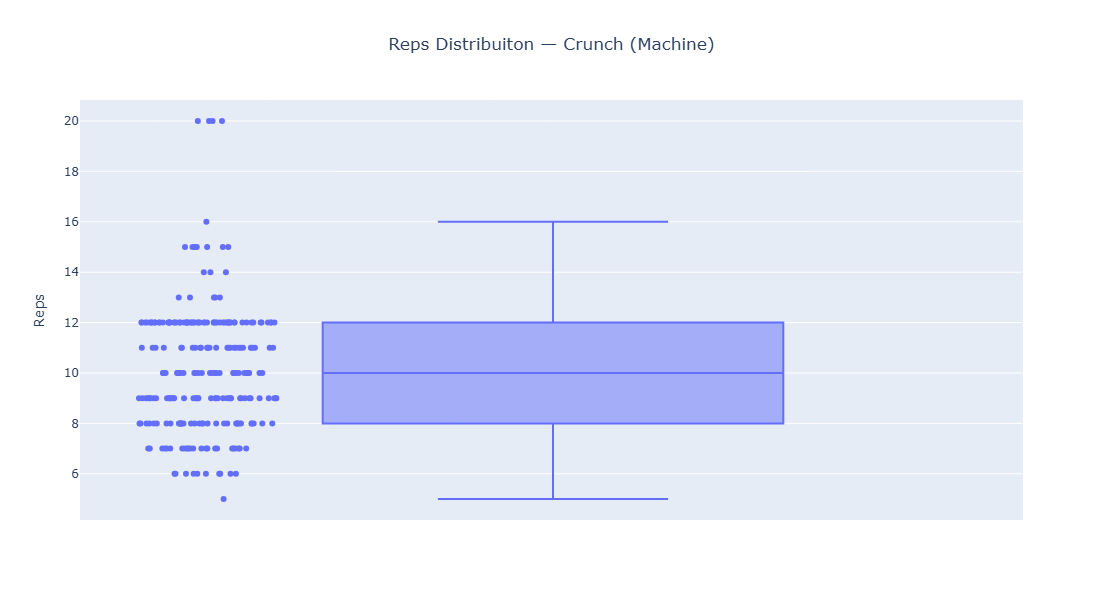

In [35]:
# Crunch (Machine)
exercise_name = "Crunch (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

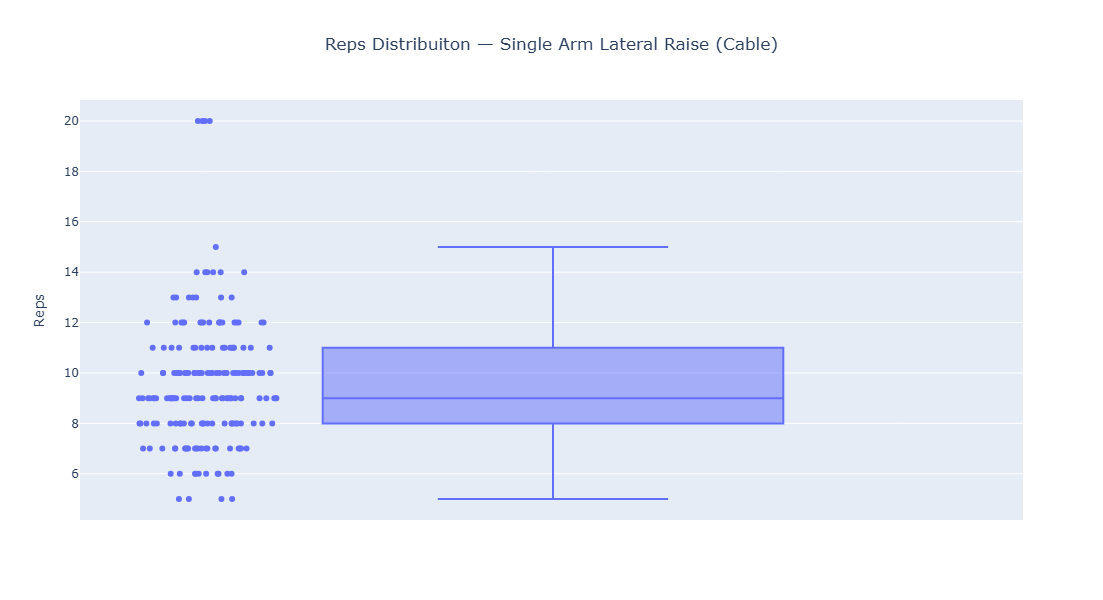

In [36]:
# Single Arm Lateral Raise (Cable)
exercise_name = "Single Arm Lateral Raise (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

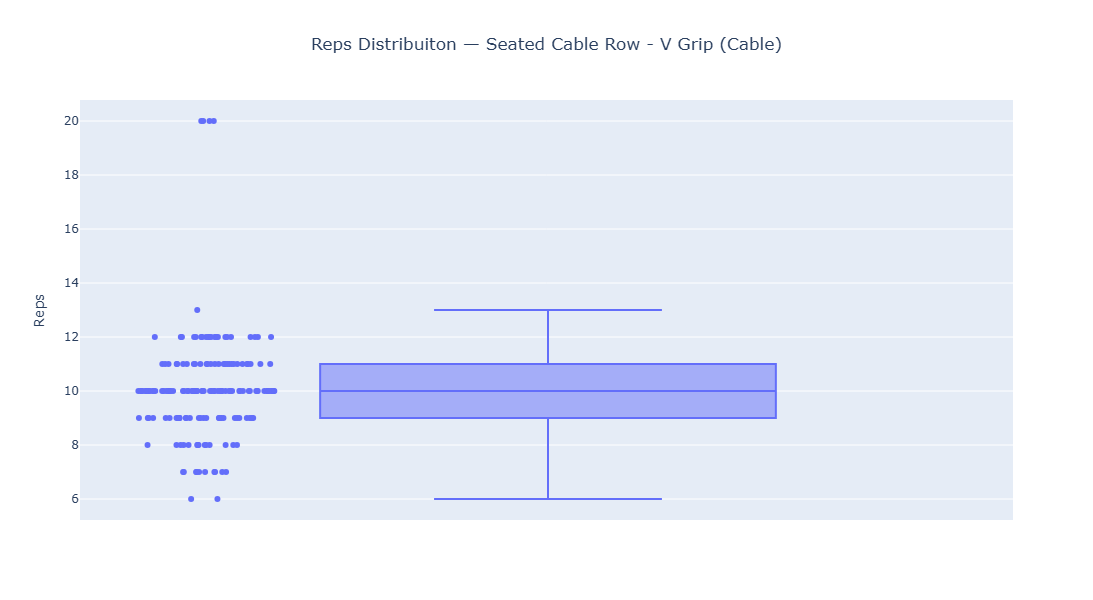

In [37]:
# Seated Cable Row - V Grip (Cable)
exercise_name = "Seated Cable Row - V Grip (Cable)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

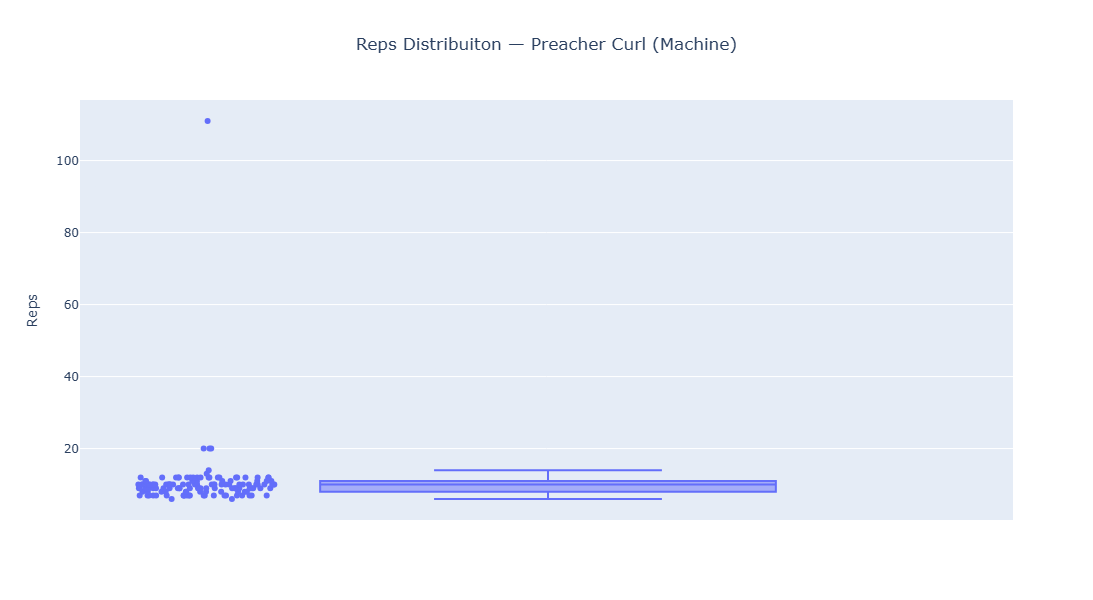

In [38]:
# Preacher Curl (Machine)
exercise_name = "Preacher Curl (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Aqui sim temos um valor incorreto, onde esta 111 na realidade são 11 repetições.

In [39]:
# Analisando exatamente esse exercicio desse dia
df[
    (df['exercise_title'] == 'Preacher Curl (Machine)') &
    (df['start_time'].str.contains('23 Jan 2024'))
]

title          start_time            end_time  \
8604  Treino B - Costas + Biceps  23 Jan 2024, 11:09  23 Jan 2024, 12:09   
8605  Treino B - Costas + Biceps  23 Jan 2024, 11:09  23 Jan 2024, 12:09   
8606  Treino B - Costas + Biceps  23 Jan 2024, 11:09  23 Jan 2024, 12:09   

     description           exercise_title  superset_id exercise_notes  \
8604         NaN  Preacher Curl (Machine)          NaN            NaN   
8605         NaN  Preacher Curl (Machine)          NaN            NaN   
8606         NaN  Preacher Curl (Machine)          NaN            NaN   

      set_index set_type  weight_kg   reps  distance_km  duration_seconds  rpe  
8604          0   normal      48.75   12.0          NaN               NaN  NaN  
8605          1   normal      48.75  111.0          NaN               NaN  NaN  
8606          2   normal      48.75   12.0          NaN               NaN  NaN

In [40]:
# Imputando o valor correto nessa série
df.loc[8605, 'reps'] = 11.0

In [41]:
# # Revalidando a serie correta
df[
    (df['exercise_title'] == 'Preacher Curl (Machine)') &
    (df['start_time'].str.contains('23 Jan 2024'))
]

title          start_time            end_time  \
8604  Treino B - Costas + Biceps  23 Jan 2024, 11:09  23 Jan 2024, 12:09   
8605  Treino B - Costas + Biceps  23 Jan 2024, 11:09  23 Jan 2024, 12:09   
8606  Treino B - Costas + Biceps  23 Jan 2024, 11:09  23 Jan 2024, 12:09   

     description           exercise_title  superset_id exercise_notes  \
8604         NaN  Preacher Curl (Machine)          NaN            NaN   
8605         NaN  Preacher Curl (Machine)          NaN            NaN   
8606         NaN  Preacher Curl (Machine)          NaN            NaN   

      set_index set_type  weight_kg  reps  distance_km  duration_seconds  rpe  
8604          0   normal      48.75  12.0          NaN               NaN  NaN  
8605          1   normal      48.75  11.0          NaN               NaN  NaN  
8606          2   normal      48.75  12.0          NaN               NaN  NaN

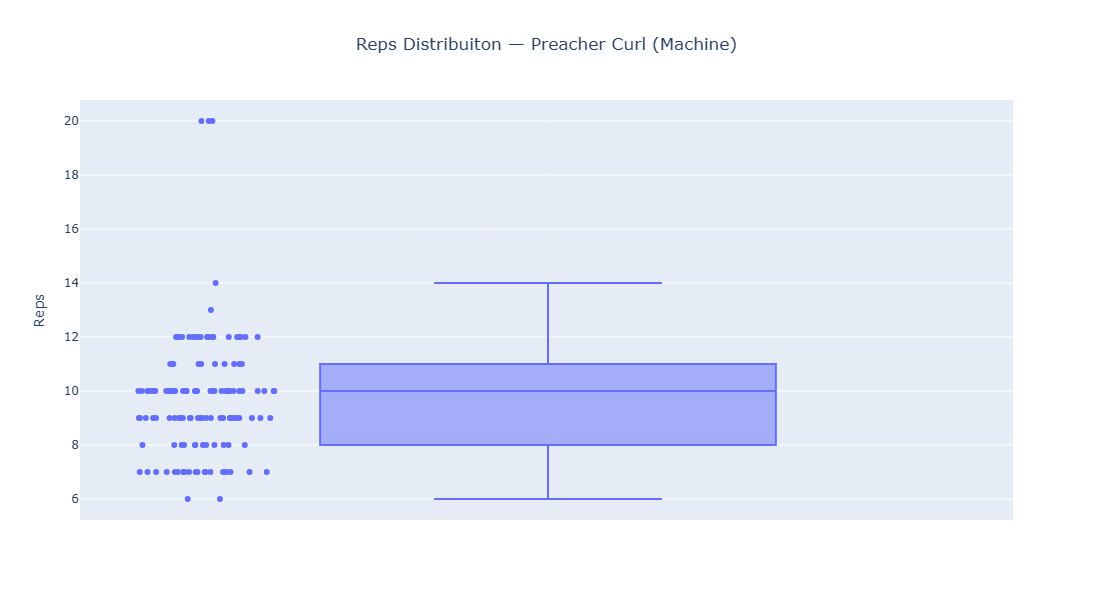

In [42]:
# Gráfico Após Correção -  Preacher Curl (Machine)
exercise_name = "Preacher Curl (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Agora sim, a justifica permanece como não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

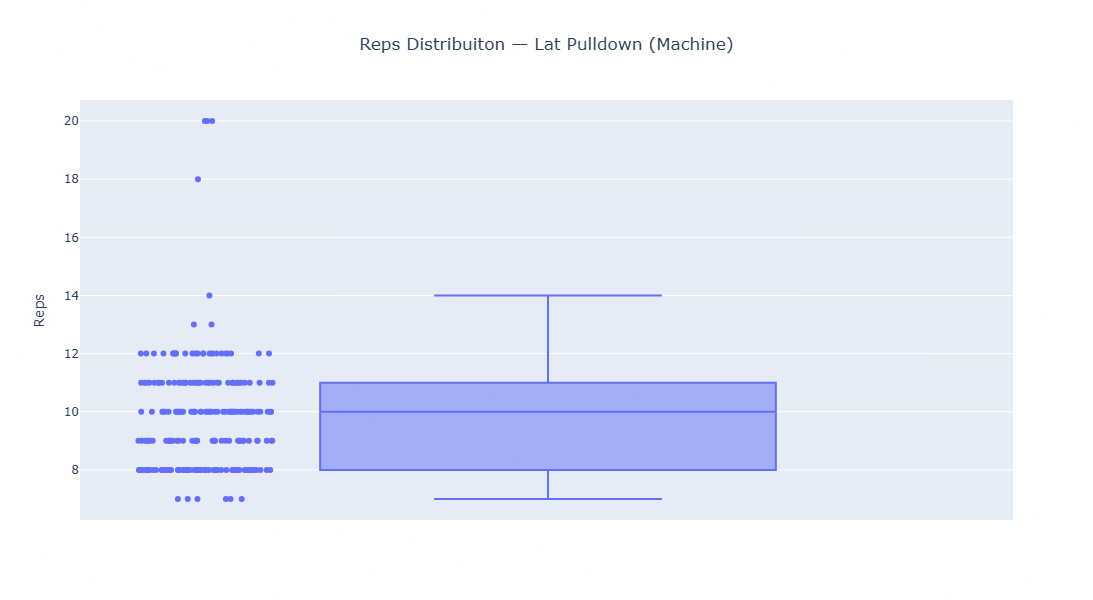

In [43]:
# Lat Pulldown (Machine)
exercise_name = "Lat Pulldown (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

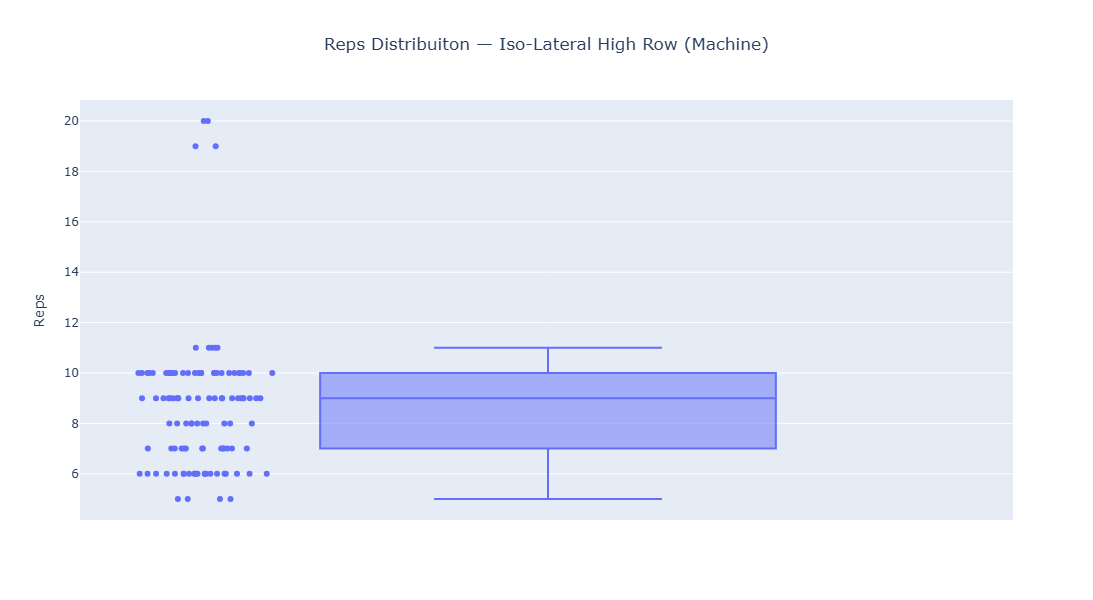

In [44]:
# Iso-Lateral High Row (Machine)
exercise_name = "Iso-Lateral High Row (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

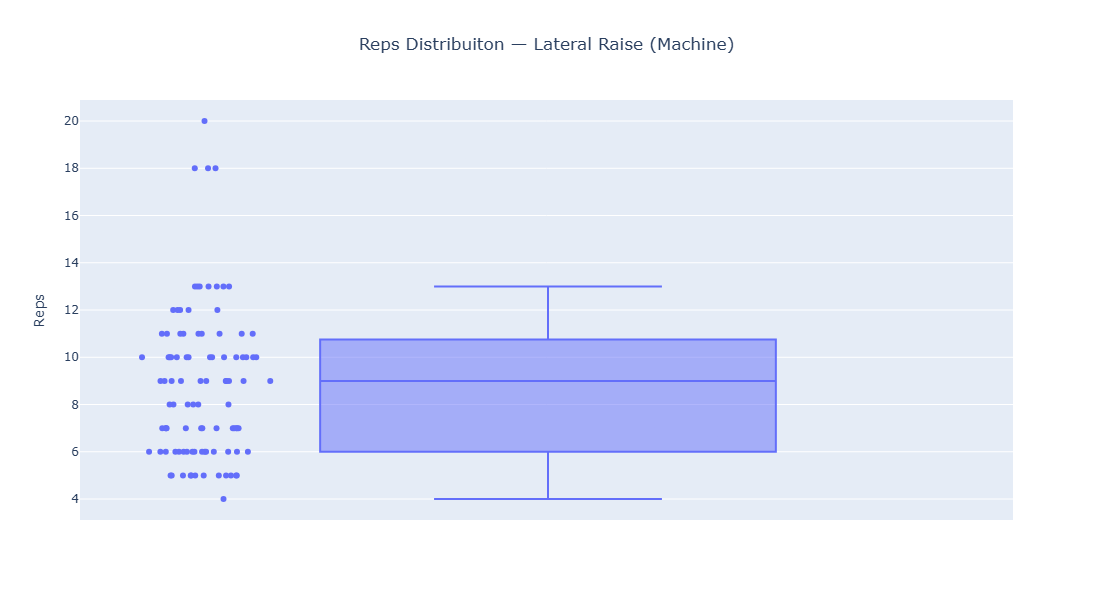

In [45]:
# Lateral Raise (Machine)
exercise_name = "Lateral Raise (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

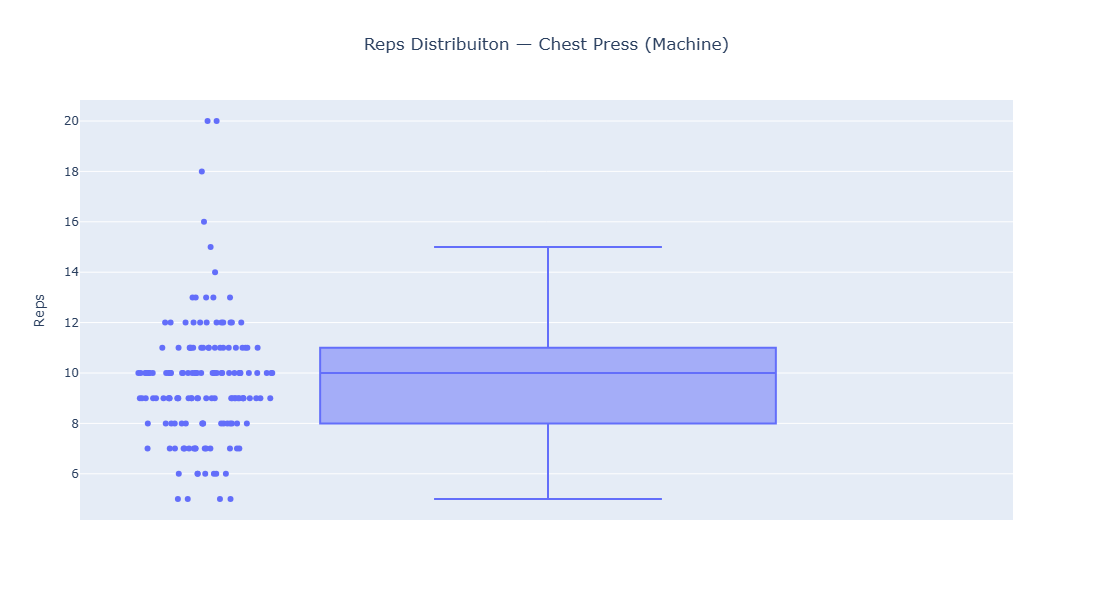

In [46]:
# Chest Press (Machine)
exercise_name = "Chest Press (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

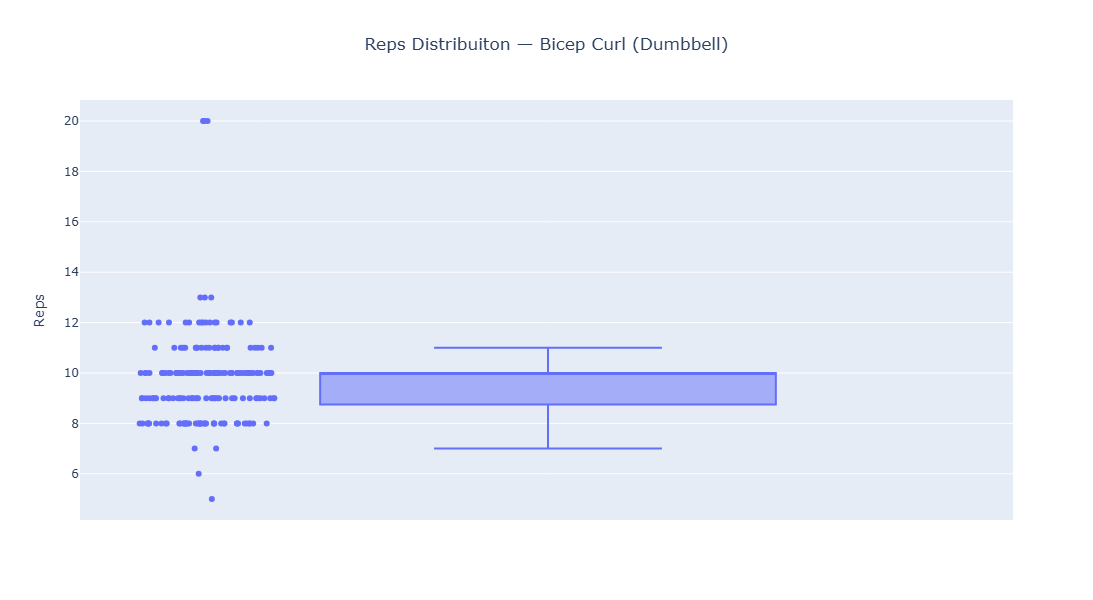

In [47]:
# Bicep Curl (Dumbbell)
exercise_name = "Bicep Curl (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

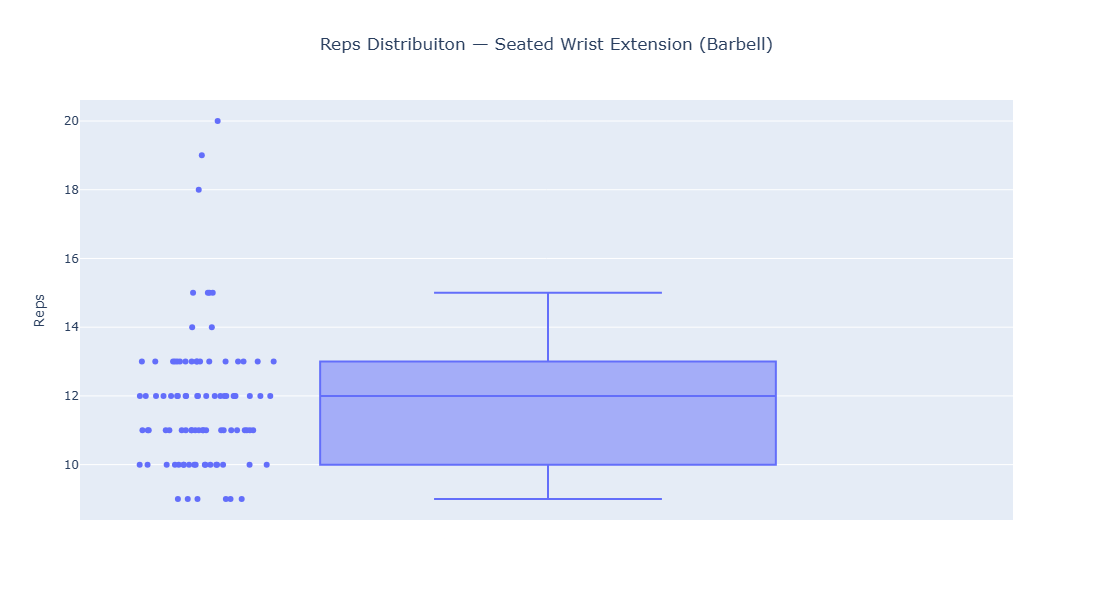

In [48]:
# Seated Wrist Extension (Barbell)
exercise_name = "Seated Wrist Extension (Barbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

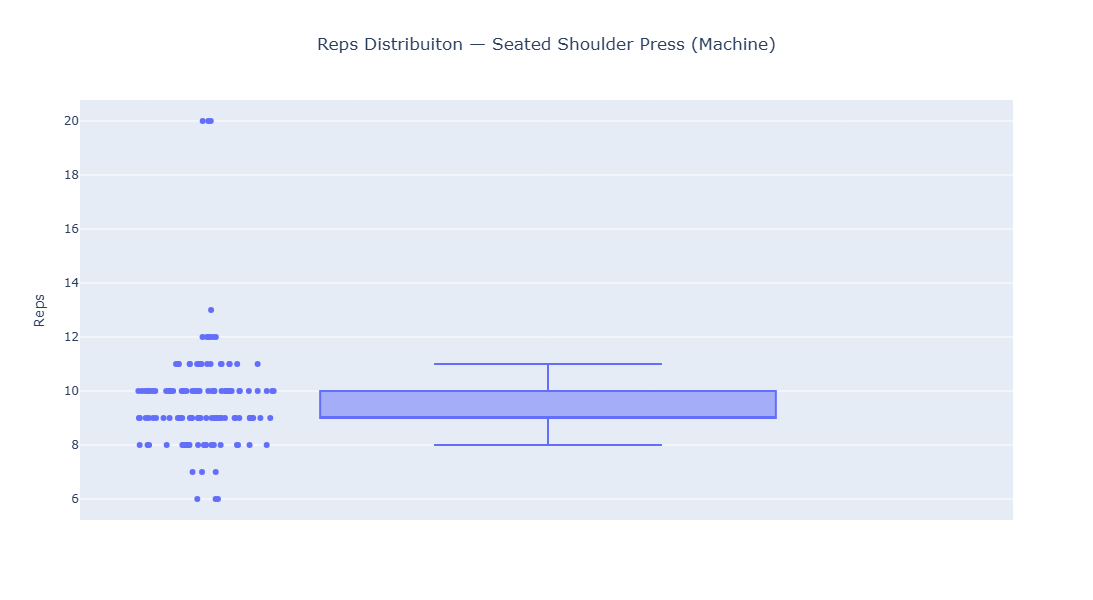

In [49]:
# Seated Shoulder Press (Machine)
exercise_name = "Seated Shoulder Press (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

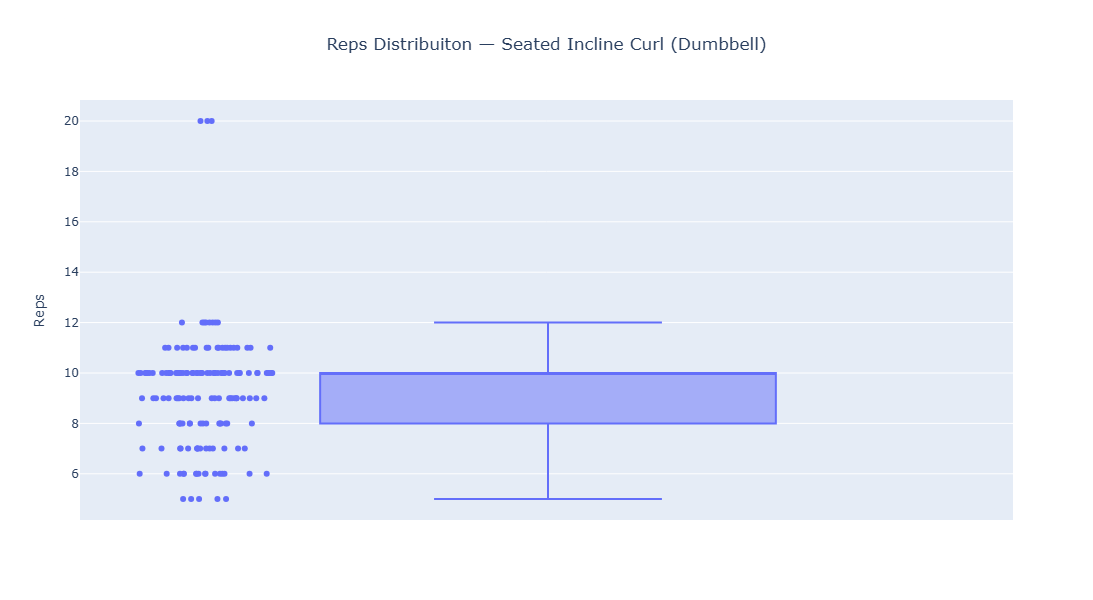

In [50]:
# Seated Incline Curl (Dumbbell)
exercise_name = "Seated Incline Curl (Dumbbell)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

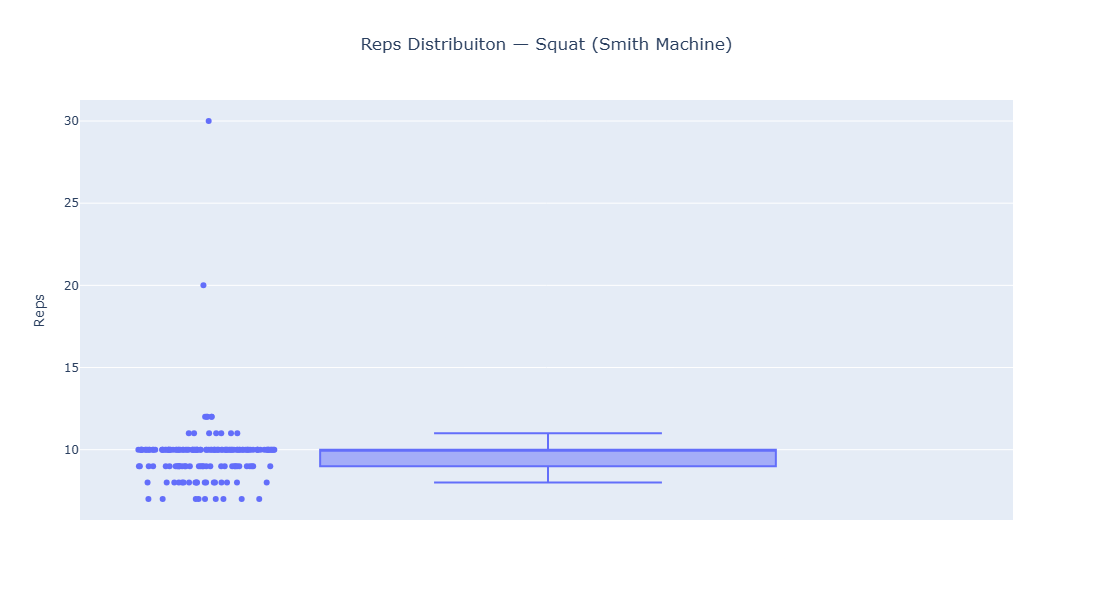

In [51]:
# Squat (Smith Machine)
exercise_name = "Squat (Smith Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (série de aquecimento sem peso)

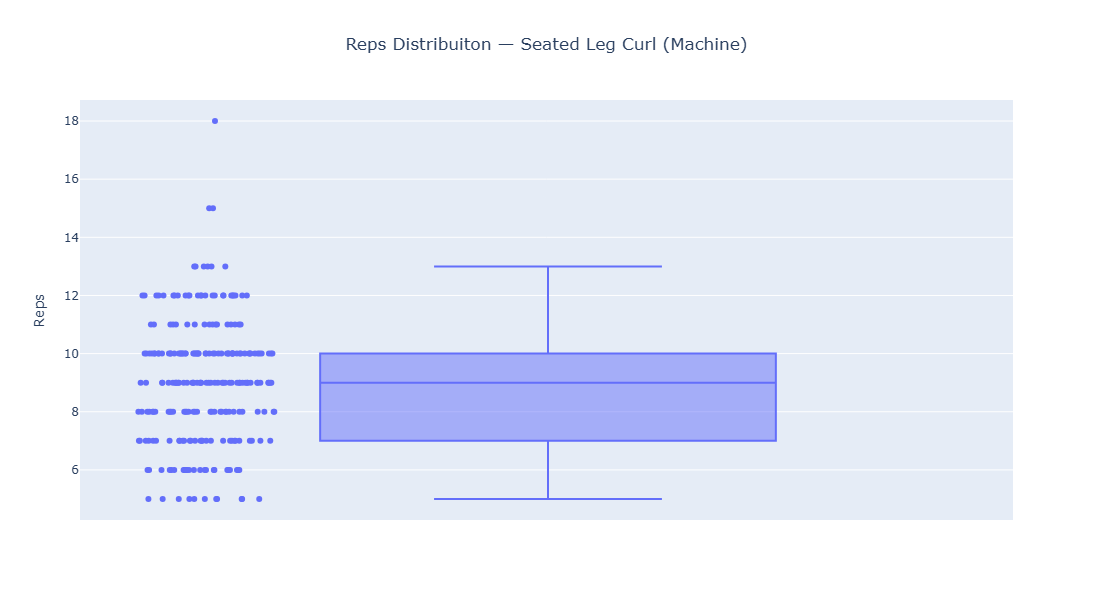

In [52]:
# Seated Leg Curl (Machine)  
exercise_name = "Seated Leg Curl (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

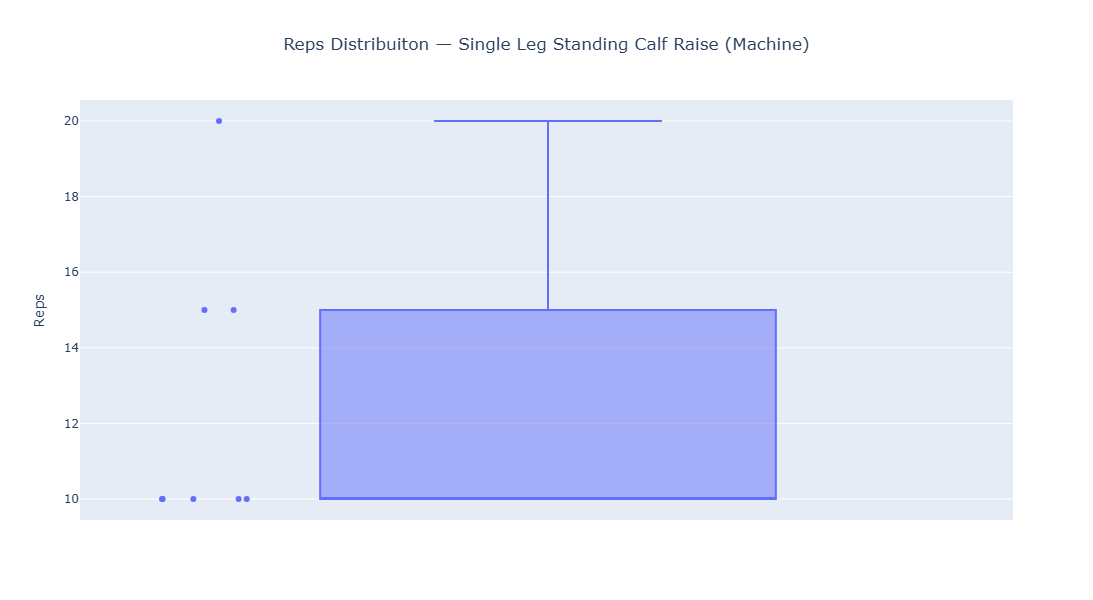

In [53]:
# Single Leg Standing Calf Raise (Machine) 
exercise_name = "Single Leg Standing Calf Raise (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

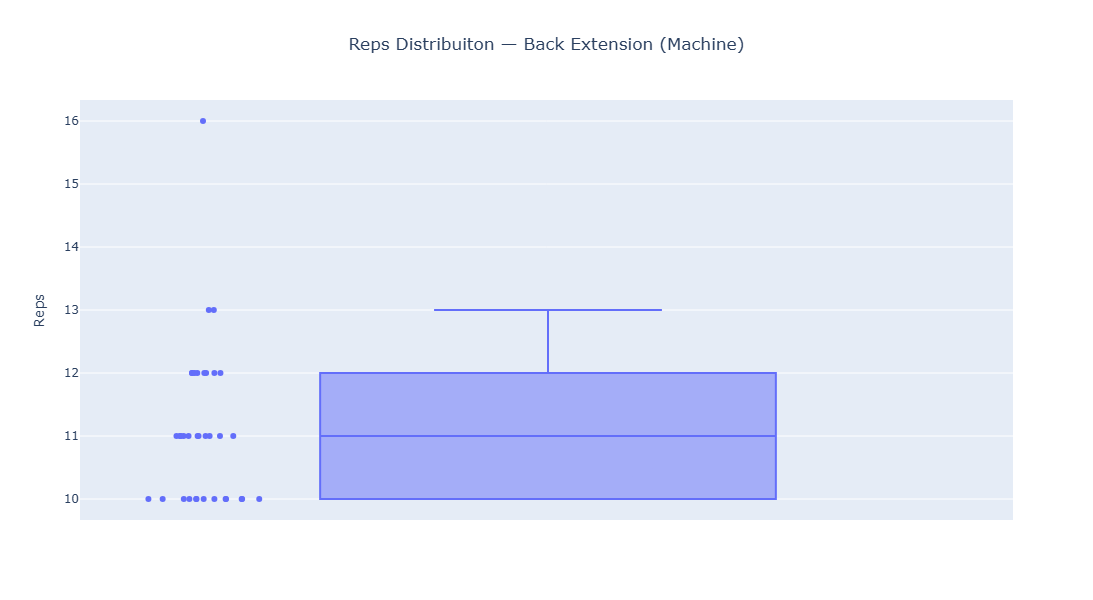

In [54]:
# Back Extension (Machine
exercise_name = "Back Extension (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

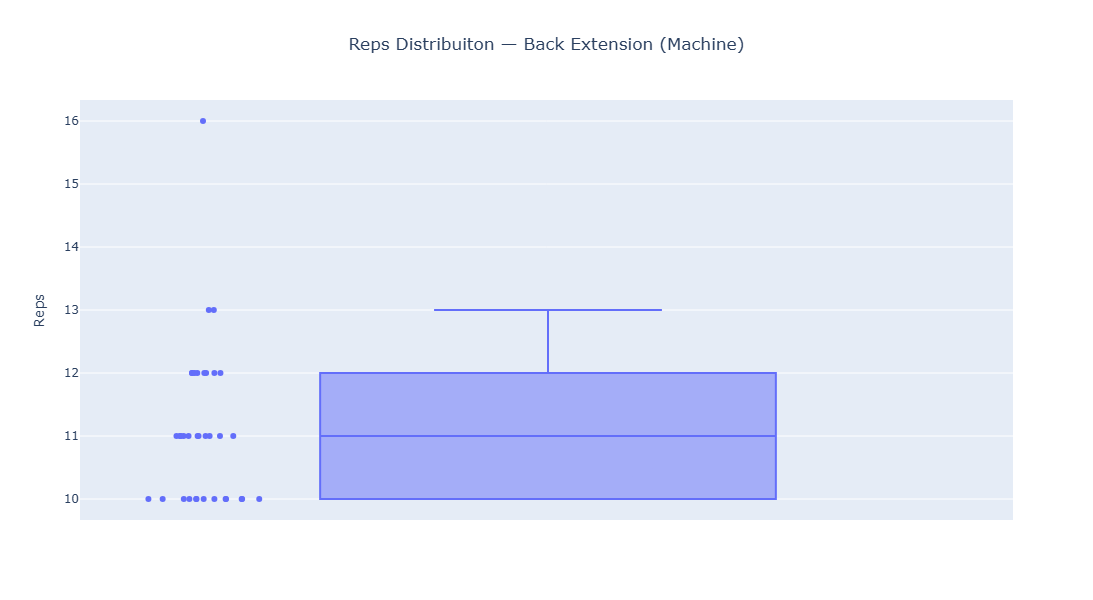

In [55]:
# Back Extension (Machine
exercise_name = "Back Extension (Machine)"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

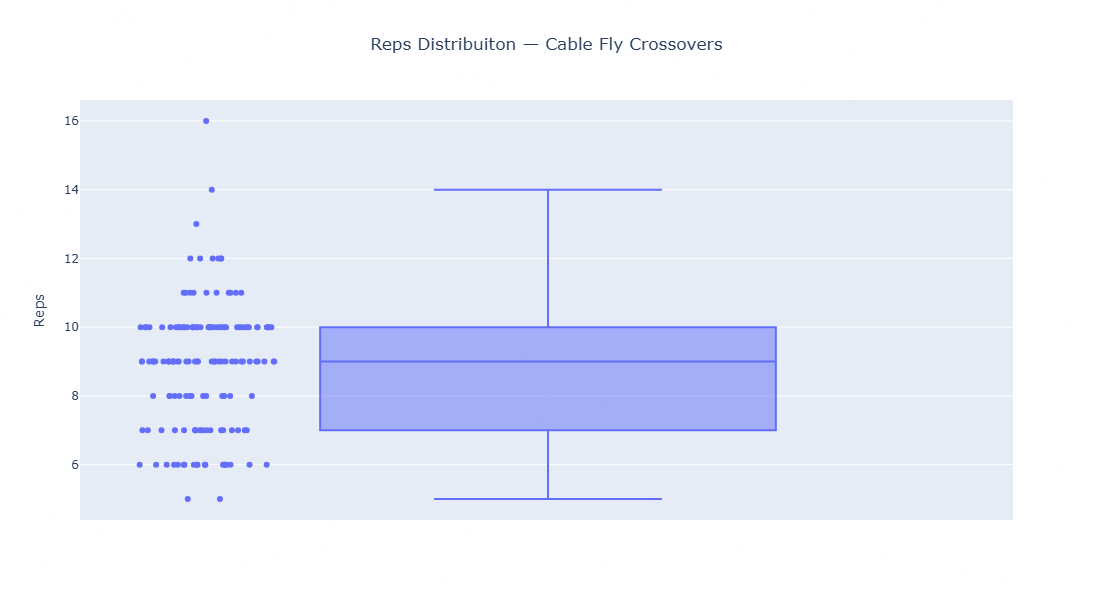

In [56]:
# Cable Fly Crossovers
exercise_name = "Cable Fly Crossovers"
df_ex = df[df["exercise_title"] == exercise_name]
fig = px.box(df_ex,y="reps",points="all",hover_data=["reps","weight_kg","set_index","set_type","rpe","start_time"],title=f"Reps Distribuiton — {exercise_name}")
fig.update_layout(yaxis_title="Reps",xaxis_title="",showlegend=False,height=600,width=900,title_x = 0.5)
fig.show()

Não há dado incorreto, apesar de ser um valor alto para repetição o contexto se justifica (carga baixa)

### Validações

In [57]:
# set_index
# Ordenando para garantir consistência
df_sorted = df.sort_values(
    by=["start_time", "exercise_title", "set_index"]
)

# Agrupando por treino + exercício
set_index_check = (
    df_sorted
    .groupby(["start_time", "exercise_title"])["set_index"]
    .apply(list)
    .reset_index(name="set_index_list")
)

# Funções de validação
def starts_with_zero(seq):
    return min(seq) == 0

def has_gaps(seq):
    return sorted(seq) != list(range(min(seq), max(seq) + 1))

# Aplicando validações
set_index_check["starts_with_zero"] = set_index_check["set_index_list"].apply(starts_with_zero)
set_index_check["has_gaps"] = set_index_check["set_index_list"].apply(has_gaps)

# Casos problemáticos
problemas_set_index = set_index_check[
    (~set_index_check["starts_with_zero"]) |
    (set_index_check["has_gaps"])
]

print(f"Total de exercícios analisados: {len(set_index_check)}")
print(f"Casos com problemas de set_index: {len(problemas_set_index)}")

problemas_set_index.head()


Total de exercícios analisados: 3447
Casos com problemas de set_index: 0


Empty DataFrame
Columns: [start_time, exercise_title, set_index_list, starts_with_zero, has_gaps]
Index: []

In [58]:
# Duração do treino

# Convertendo para datetime
df["start_time_dt"] = pd.to_datetime(df["start_time"], format="%d %b %Y, %H:%M")
df["end_time_dt"] = pd.to_datetime(df["end_time"], format="%d %b %Y, %H:%M")

# Calculando duração em minutos
df["duracao_treino_min"] = (
    (df["end_time_dt"] - df["start_time_dt"])
    .dt.total_seconds() / 60
)

# Agregando por treino (um treino pode ter várias linhas)
duracao_por_treino = (
    df.groupby(["title", "start_time"])
    .agg(
        duracao_min=("duracao_treino_min", "first")
    )
    .reset_index()
)

# Treinos muito longos (> 4 horas)
treinos_longos = duracao_por_treino[
    duracao_por_treino["duracao_min"] > 240
]

# Treinos muito curtos (< 10 minutos)
treinos_curtos = duracao_por_treino[
    duracao_por_treino["duracao_min"] < 10
]

print(f"Treinos > 4h: {len(treinos_longos)}")
print(f"Treinos < 10min: {len(treinos_curtos)}")

treinos_longos.head(), treinos_curtos.head()

Treinos > 4h: 0
Treinos < 10min: 0


(Empty DataFrame
 Columns: [title, start_time, duracao_min]
 Index: [],
 Empty DataFrame
 Columns: [title, start_time, duracao_min]
 Index: [])

In [59]:
# Consistência de nomes

# Total de exercícios únicos
exercicios_unicos = df["exercise_title"].nunique()

# Frequência por exercício
freq_exercicios = df["exercise_title"].value_counts()

# Exercícios que aparecem apenas 1 vez
exercicios_uma_vez = freq_exercicios[freq_exercicios == 1]

print(f"Total de exercícios únicos: {exercicios_unicos}")
print(f"Exercícios que aparecem apenas 1 vez: {len(exercicios_uma_vez)}")

exercicios_uma_vez.head(10)


Total de exercícios únicos: 118
Exercícios que aparecem apenas 1 vez: 5


exercise_title
Walking                  1
Stair Machine (Steps)    1
Push Up                  1
Squat (Bodyweight)       1
Plank                    1
Name: count, dtype: int64

### Analise Final

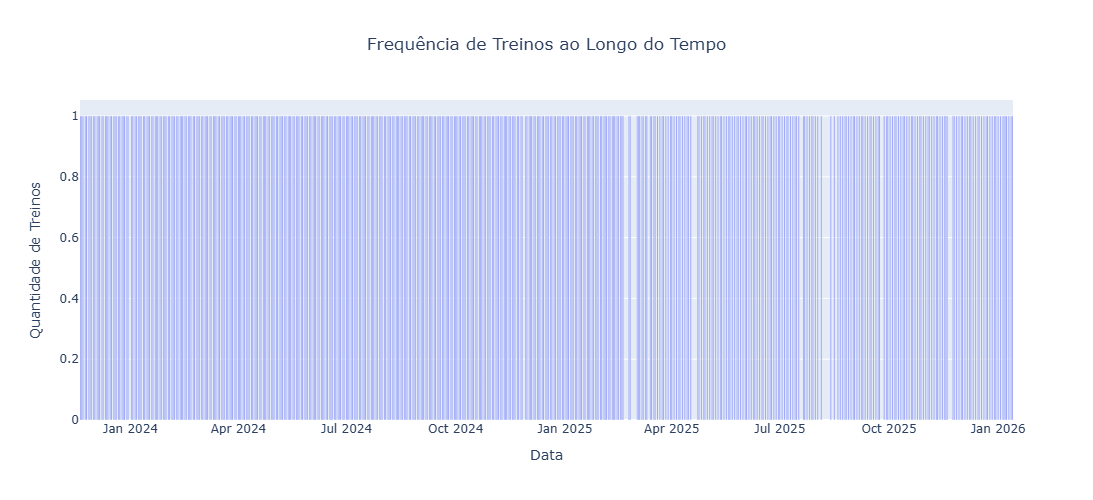

In [60]:
# Treinos por dia
df["data_treino"] = df["start_time_dt"].dt.date

treinos_por_dia = (
    df.groupby("data_treino")["title"]
    .nunique()
    .reset_index(name="qtde_treinos")
)

fig = px.bar(
    treinos_por_dia,
    x="data_treino",
    y="qtde_treinos",
    title="Frequência de Treinos ao Longo do Tempo"
)

fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Quantidade de Treinos",
    title_x=0.5,
    height=500
)

fig.show()


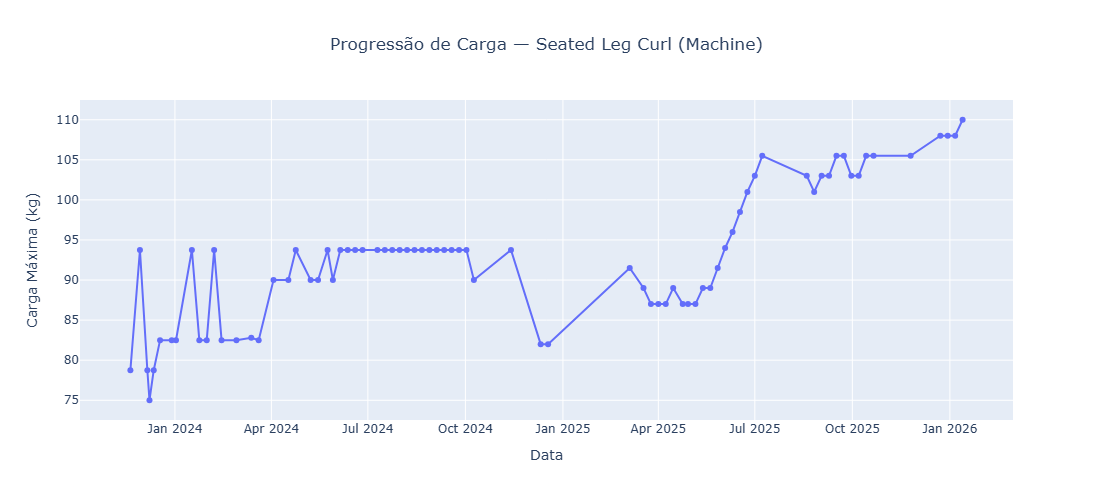

In [61]:
# Evolução de carga - exercício 

exercise_name = "Seated Leg Curl (Machine)"

df_ex = (
    df[df["exercise_title"] == exercise_name]
    .groupby("data_treino")
    .agg(carga_max=("weight_kg", "max"))
    .reset_index()
)

fig = px.line(
    df_ex,
    x="data_treino",
    y="carga_max",
    markers=True,
    title=f"Progressão de Carga — {exercise_name}"
)

fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Carga Máxima (kg)",
    title_x=0.5,
    height=500
)

fig.show()


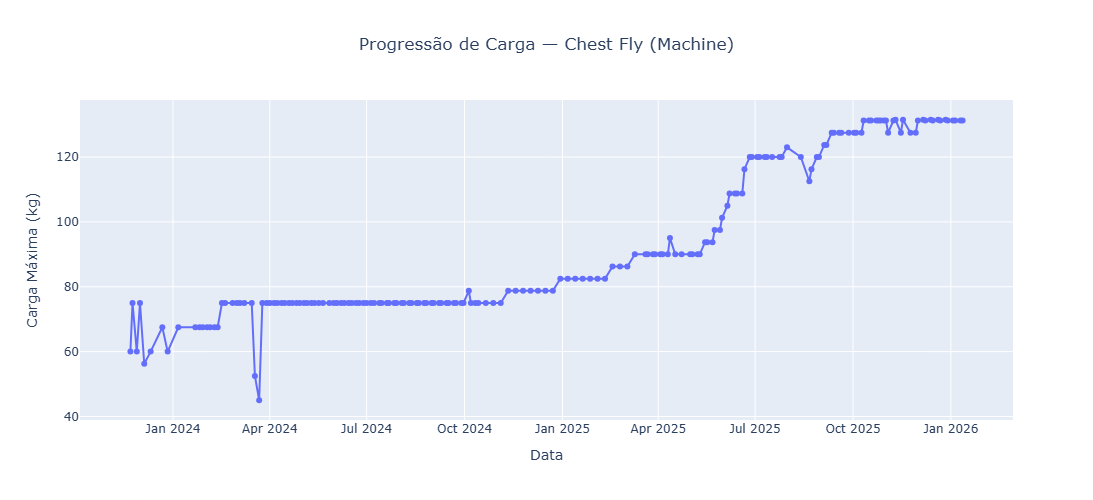

In [62]:
# Progressão de carga - exercício específico

exercise_name = "Chest Fly (Machine)"

df_ex = (
    df[df["exercise_title"] == exercise_name]
    .groupby("data_treino")
    .agg(carga_max=("weight_kg", "max"))
    .reset_index()
)

fig = px.line(
    df_ex,
    x="data_treino",
    y="carga_max",
    markers=True,
    title=f"Progressão de Carga — {exercise_name}"
)

fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Carga Máxima (kg)",
    title_x=0.5,
    height=500
)

fig.show()

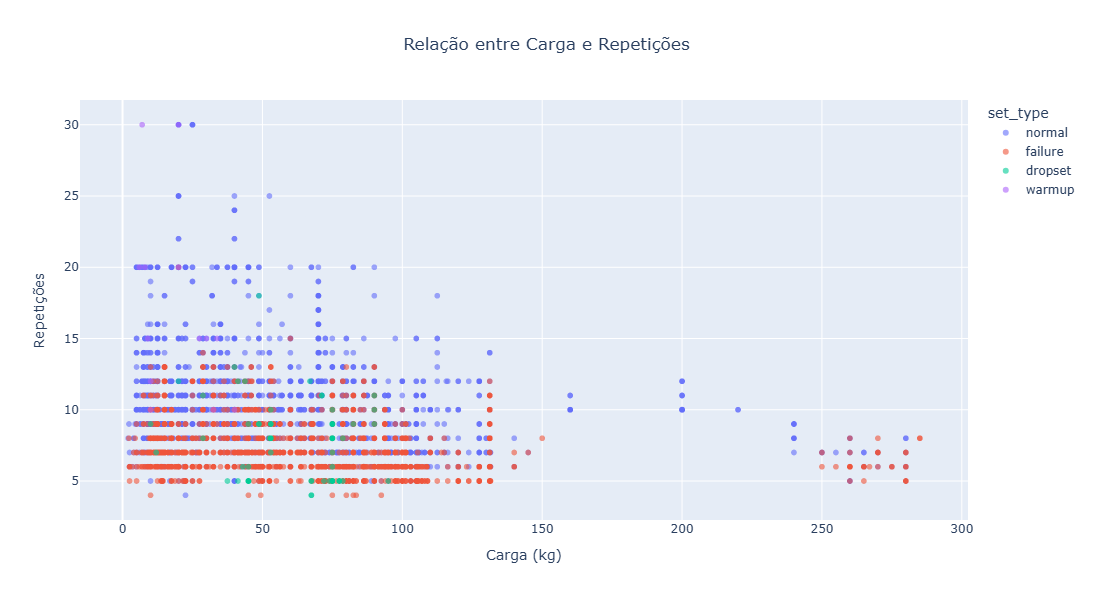

In [63]:
# Scatter: peso x reps

fig = px.scatter(
    df,
    x="weight_kg",
    y="reps",
    color="set_type",
    opacity=0.6,
    title="Relação entre Carga e Repetições",
    hover_data=["exercise_title", "data_treino"]
)

fig.update_layout(
    xaxis_title="Carga (kg)",
    yaxis_title="Repetições",
    title_x=0.5,
    height=600
)

fig.show()

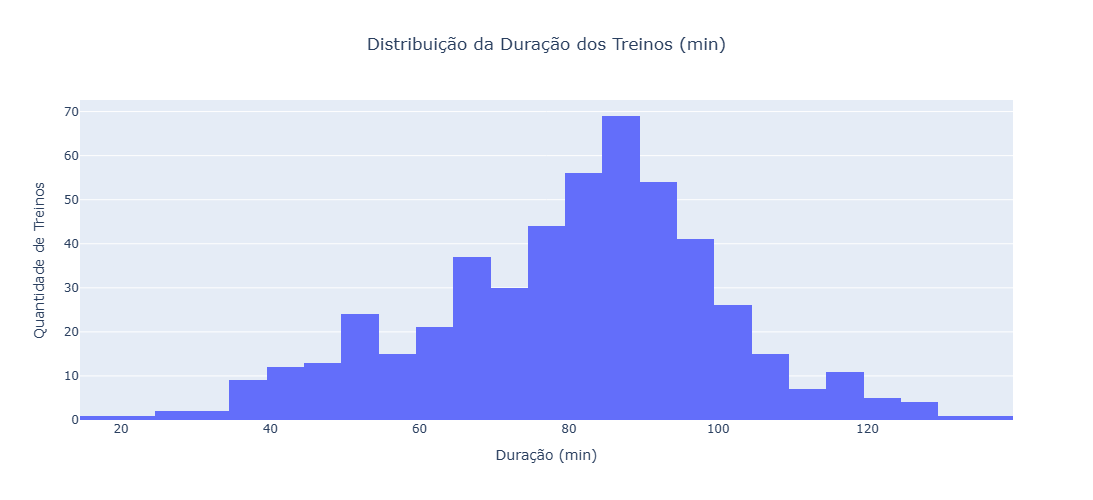

In [64]:
# Histograma de duração dos treinos

fig = px.histogram(
    duracao_por_treino,
    x="duracao_min",
    nbins=30,
    title="Distribuição da Duração dos Treinos (min)"
)

fig.update_layout(
    xaxis_title="Duração (min)",
    yaxis_title="Quantidade de Treinos",
    title_x=0.5,
    height=500
)

fig.show()


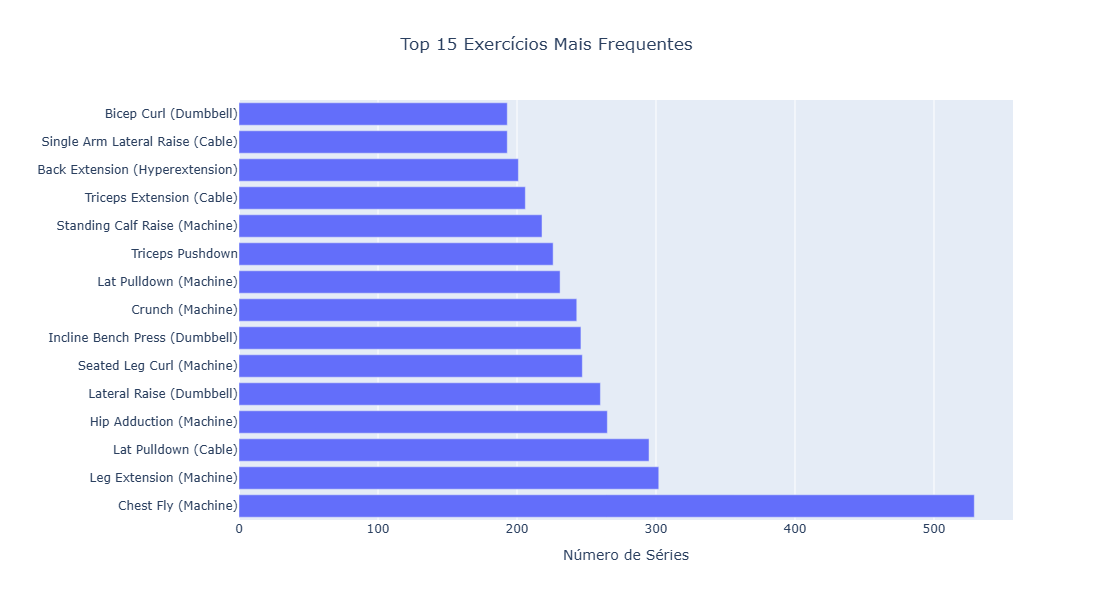

In [65]:
# exercícios mais frequentes


top_exercicios = (
    df["exercise_title"]
    .value_counts()
    .head(15)
    .reset_index()
)

top_exercicios.columns = ["exercise_title", "frequencia"]

fig = px.bar(
    top_exercicios,
    x="frequencia",
    y="exercise_title",
    orientation="h",
    title="Top 15 Exercícios Mais Frequentes"
)

fig.update_layout(
    xaxis_title="Número de Séries",
    yaxis_title="",
    title_x=0.5,
    height=600
)

fig.show()


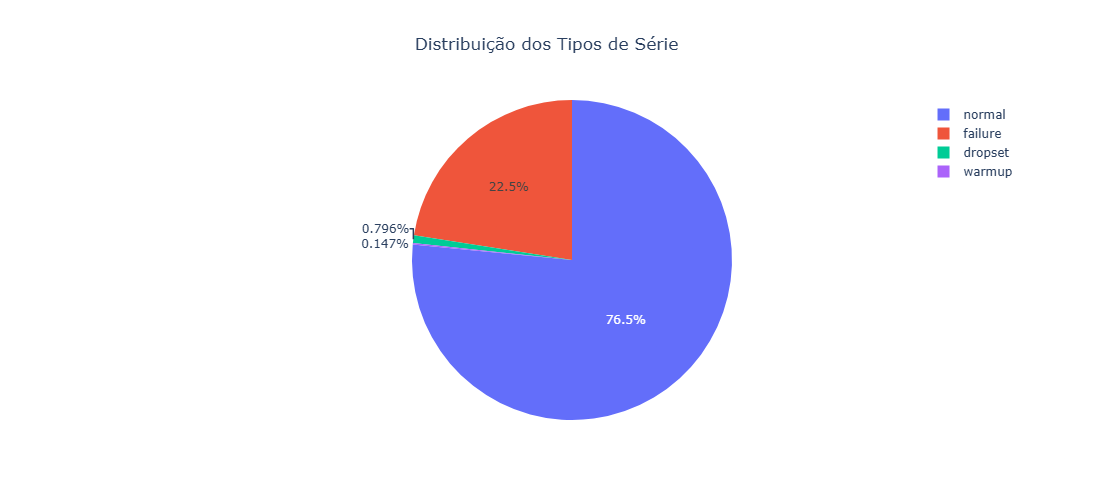

In [66]:
# Tipos de série

fig = px.pie(
    df,
    names="set_type",
    title="Distribuição dos Tipos de Série"
)

fig.update_layout(
    title_x=0.5,
    height=500
)

fig.show()


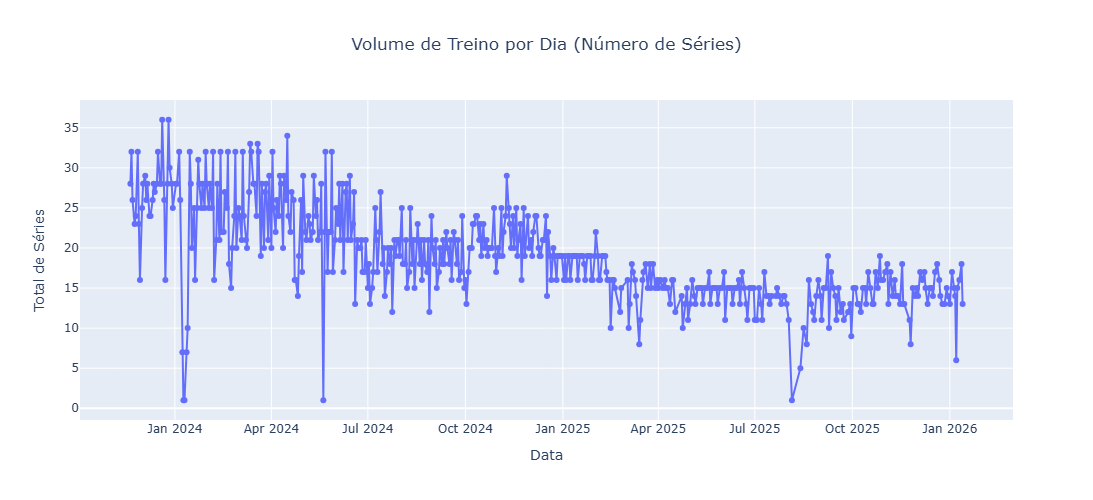

In [67]:
# Volume de treino

# Garantindo a coluna de data
df["data_treino"] = df["start_time_dt"].dt.date

# Cada linha representa uma série → volume = contagem de linhas
volume_series_diario = (
    df.groupby("data_treino")
    .size()
    .reset_index(name="total_series")
)

fig = px.line(
    volume_series_diario,
    x="data_treino",
    y="total_series",
    markers=True,
    title="Volume de Treino por Dia (Número de Séries)"
)

fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Total de Séries",
    title_x=0.5,
    height=500
)

fig.show()


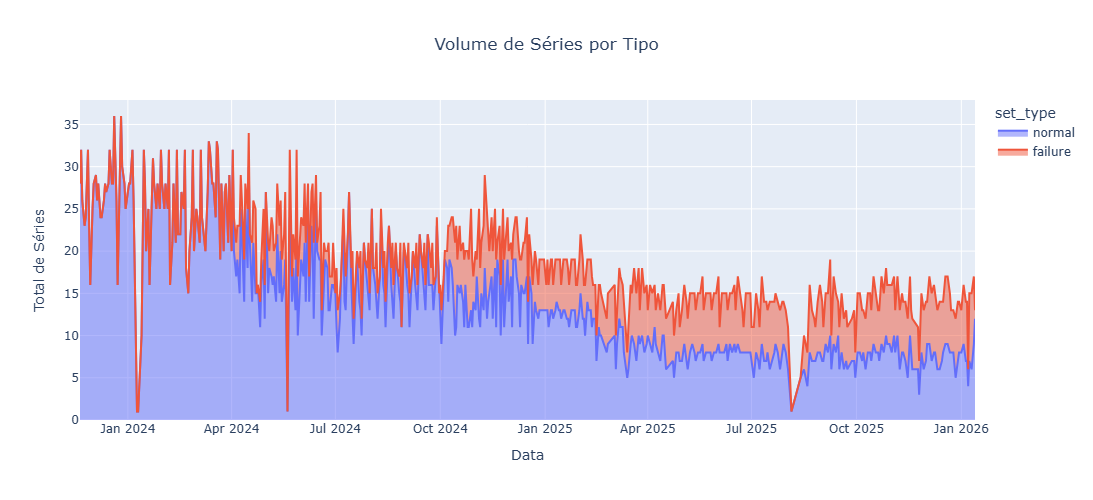

In [68]:
df["data_treino"] = df["start_time_dt"].dt.date

df_efetivas = df[df["set_type"].isin(["normal", "failure"])]

volume_por_tipo = (
    df_efetivas
    .groupby(["data_treino", "set_type"])
    .size()
    .reset_index(name="total_series")
)

fig = px.area(
    volume_por_tipo,
    x="data_treino",
    y="total_series",
    color="set_type",
    title="Volume de Séries por Tipo"
)

fig.update_layout(
    xaxis_title="Data",
    yaxis_title="Total de Séries",
    title_x=0.5,
    height=500
)

fig.show()


In [69]:
# Salvando o dataset limpo
df.to_csv("hevy_workouts_clean.csv",index=False,encoding="utf-8")